# PART 1

## **** CREDIT CARD FRAUD DETECTION ****

Credit Card Fraud Detection is a critical area of research in the financial sector, aiming to identify and prevent unauthorized transactions on credit card accounts. As digital payment systems grow, so do the risks associated with fraudulent activities. Detecting these fraudulent transactions quickly and accurately is crucial to protect both consumers and financial institutions. This project focuses on leveraging advanced machine learning algorithms and data analysis techniques to build models that can predict and flag potentially fraudulent activities, ensuring safer and more secure credit card transactions

## Import Required Libraries and Data

In [209]:
# Import required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

import warnings 
warnings.filterwarnings('ignore')

In [210]:
# Load the data
df = pd.read_csv('fraud.csv')

## Exploratory Data Analysis - 1

#### Data Understading

In [211]:
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,01/01/2019 0:00,2.700000e+15,"Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",09/03/1988,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,01/01/2019 0:00,6.300000e+11,"Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,21/06/1978,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,01/01/2019 0:00,3.890000e+13,Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,42.1808,-112.2620,4154,Nature conservation officer,19/01/1962,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,01/01/2019 0:01,3.530000e+15,"Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,46.2306,-112.1138,1939,Patent attorney,12/01/1967,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,01/01/2019 0:03,3.760000e+14,Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,38.4207,-79.4629,99,Dance movement psychotherapist,28/03/1986,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


#### List of Columns

01. trans_date_trans_time : Timestamp of the transaction.
02. cc_num : Credit card number used for the transaction.
03. merchant : Name of the merchant where the transaction occurred.
04. category : Type of transaction (e.g., Gas, Grocery POS, Home).
05. amt : Transaction amount in dollars.
06. first : First name of the cardholder.
07. last : Last name of the cardholder.
08. gender : Gender of the cardholder (e.g., Male, Female).
09. street : Street address of the cardholder.
10. city : City where the cardholder resides.
11. state : State where the cardholder resides.
12. zip : Zip code of the cardholder’s address.
13. lat : Latitude of the cardholder’s location.
14. long : Longitude of the cardholder’s location.
15. city_pop : Population of the city where the cardholder resides.
16. job : Occupation of the cardholder.
17. dob : Date of birth of the cardholder.
18. trans_num : Unique identifier for each transaction.
19. unix_time : Transaction timestamp in Unix time format (seconds since 1970-01-01).
20. merch_lat : Latitude of the merchant’s location.
21. merch_long : Longitude of the merchant’s location.
22. is_fraud : Target variable (1 = Fraudulent transaction, 0 = Legitimate transaction)


#### Following columns will be dropped

1. first & last – Names do not contribute to fraud detection.
2. street – Too granular; does not help in identifying fraud patterns.
3. zip – Redundant since we already have city and state.
4. trans_num – A unique identifier that does not help in modeling fraud.
5. unix_time – Redundant; trans_date_trans_time already captures the timestamp.
6. gender – If fraud cases are evenly distributed across genders, this column will be dropped.
7. city_pop – Might not be useful, but we will analyze its impact before deciding.

In [212]:
# Check if data has any NULL values
df.isna().sum()

trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [213]:
# Basic Statistics
round(df.describe().T,1)

,count,mean,std,min,25%,50%,75%,max
cc_num,1048575.0,4.171800e+17,1.308893e+18,6.041621e+10,1.800000e+14,3.520000e+15,4.640000e+15,4.990000e+18
amt,1048575.0,7.030000e+01,1.600000e+02,1.000000e+00,9.600000e+00,4.740000e+01,8.300000e+01,2.894890e+04
zip,1048575.0,4.880160e+04,2.689800e+04,1.257000e+03,2.623700e+04,4.817400e+04,7.204200e+04,9.978300e+04
lat,1048575.0,3.850000e+01,5.100000e+00,2.000000e+01,3.460000e+01,3.940000e+01,4.190000e+01,6.670000e+01
long,1048575.0,-9.020000e+01,1.380000e+01,-1.657000e+02,-9.680000e+01,-8.750000e+01,-8.020000e+01,-6.800000e+01
city_pop,1048575.0,8.905780e+04,3.024351e+05,2.300000e+01,7.430000e+02,2.456000e+03,2.032800e+04,2.906700e+06
unix_time,1048575.0,1.344906e+09,1.019700e+07,1.325376e+09,1.336682e+09,1.344902e+09,1.354366e+09,1.362932e+09
merch_lat,1048575.0,3.850000e+01,5.100000e+00,1.900000e+01,3.470000e+01,3.940000e+01,4.200000e+01,6.750000e+01
merch_long,1048575.0,-9.020000e+01,1.380000e+01,-1.667000e+02,-9.690000e+01,-8.740000e+01,-8.020000e+01,-6.700000e+01
is_fraud,1048575.0,0.000000e+00,1.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00


In [214]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 22 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   trans_date_trans_time  1048575 non-null  object 
 1   cc_num                 1048575 non-null  float64
 2   merchant               1048575 non-null  object 
 3   category               1048575 non-null  object 
 4   amt                    1048575 non-null  float64
 5   first                  1048575 non-null  object 
 6   last                   1048575 non-null  object 
 7   gender                 1048575 non-null  object 
 8   street                 1048575 non-null  object 
 9   city                   1048575 non-null  object 
 10  state                  1048575 non-null  object 
 11  zip                    1048575 non-null  int64  
 12  lat                    1048575 non-null  float64
 13  long                   1048575 non-null  float64
 14  city_pop          

In [215]:
df.shape

(1048575, 22)

In [216]:
#Class Distribution
df['is_fraud'].value_counts() 

is_fraud
0    1042569
1       6006
Name: count, dtype: int64

In [217]:
# Percentage distribution of Class
df['is_fraud'].value_counts(normalize=True)*100 

is_fraud
0    99.427223
1     0.572777
Name: proportion, dtype: float64

The data has a significant imbalance between the two classes. Class 0 (non-fraud) has 1,042,569 instances, while Class 1 (fraud) has only 6,006 instances. This represents about 0.57% of the total data, meaning fraudulent cases are vastly underrepresented.

Accuracy might not be a good metric in this case. Since most predictions could be "non-fraud," the model could have a high accuracy score, but it might fail to identify a meaningful number of fraudulent instances.

Metrics such as precision, recall, F1-score, or ROC-AUC are more informative, especially for the minority class, since they focus on performance with respect to fraudulent transactions.

Due to the class imbalance, techniques like oversampling (e.g., SMOTE) or undersampling the majority class could help balance the data, leading to better model training. Alternatively, adjusting class weights during model training can help give more importance to the minority class.

In [218]:
print("Initial Finding of Fraudulent Transactions :")
print('- 99% of the transactions fall below' ,round(df['amt'].quantile(0.99),2))
print(f'- A total of {(df['amt'] > df['amt'].quantile(0.99)).sum()} transactions  exceed this threshold, making them potential indicators of fraud.')

Initial Finding of Fraudulent Transactions :
- 99% of the transactions fall below 544.89
- A total of 10486 transactions  exceed this threshold, making them potential indicators of fraud.


In [219]:
# Statistics of the Amount Column
round(df['amt'].describe(),2)

count    1048575.00
mean          70.28
std          159.95
min            1.00
25%            9.64
50%           47.45
75%           83.05
max        28948.90
Name: amt, dtype: float64

#### Distribution of Transaction Amount

Text(0, 0.5, 'Frequency')

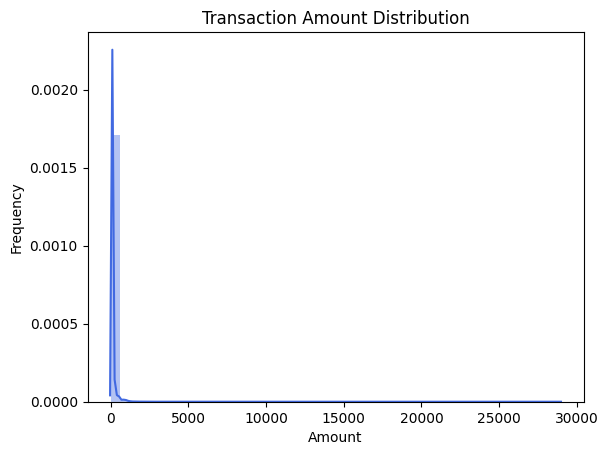

In [220]:
# Amount Distribution
sns.distplot(df['amt'], color='royalblue')
plt.title('Transaction Amount Distribution')
plt.xlabel('Amount')
plt.ylabel('Frequency')

The right skew indicates the presence of outliers or extreme values, where a small number of transactions have much higher amounts than the rest. These outliers could represent rare, large transactions or potentially fraudulent activities.

#### Amount vs Fraud

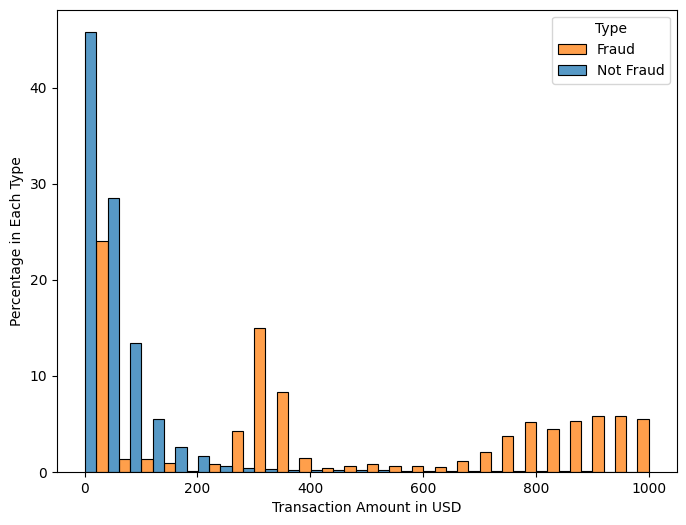

In [221]:
# Amount vs Fraud for amounts less than $1000
plt.figure(figsize=(8,6))
ax=sns.histplot(x='amt',data=df[df.amt<=1000],hue='is_fraud',stat='percent',multiple='dodge',common_norm=False,bins=25)
ax.set_ylabel('Percentage in Each Type')
ax.set_xlabel('Transaction Amount in USD')
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])

Transactions with amounts above 250 are primarily associated with fraudulent activities. This suggests that larger transactions may be a strong indicator of fraud.

#### Gender vs Fraud

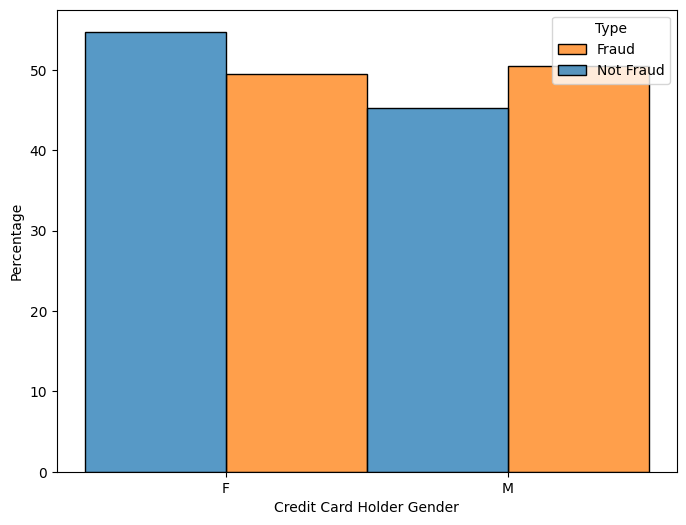

In [222]:
#Gender vs Fraud
plt.figure(figsize=(8,6))
sns.histplot(x='gender',data=df, hue='is_fraud',stat='percent',multiple='dodge',common_norm=False)
plt.ylabel('Percentage')
plt.xlabel('Credit Card Holder Gender')
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])

In this case, we do not see a clear difference between both genders. Data seem to suggest that females and males are almost equally susceptible (50%) to transaction fraud. Gender is not very indicative of a fraudulent transaction.

#### Spending Category

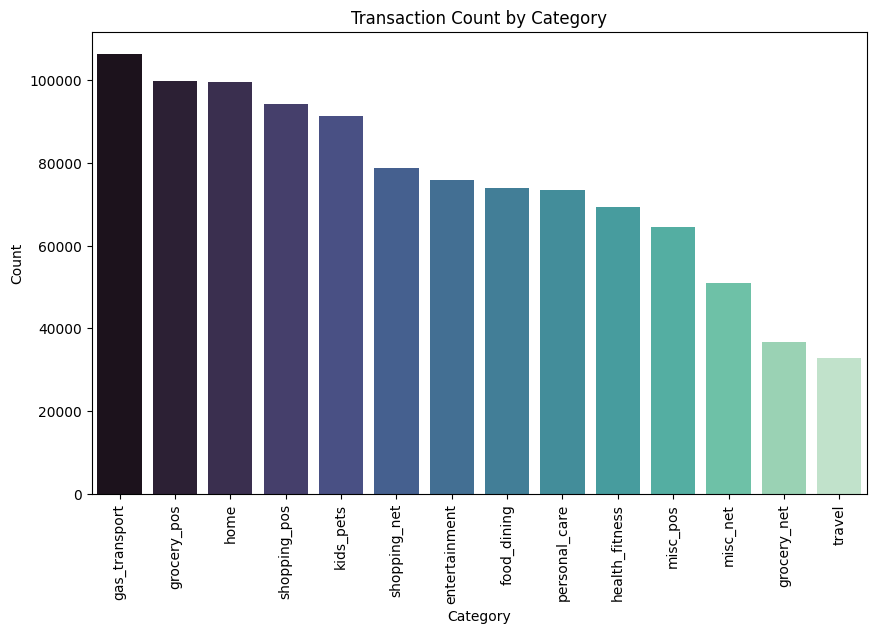

In [223]:
# Visualizing transaction counts by category
plt.figure(figsize=(10, 6))
sns.countplot(x='category', data=df, palette='mako', order=df['category'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Transaction Count by Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

The most common transaction categories in the dataset are Gas, Grocery POS, and Home, suggesting that these are the most regular spending areas for cardholders.

In [224]:
# Count fraudulent transactions by category
fraud_cat = df[df['is_fraud'] == 1]['category'].value_counts().head(10).reset_index()
fraud_cat.columns = ['category', 'count'] 
fraud_cat

,category,count
0,grocery_pos,1396
1,shopping_net,1375
2,misc_net,742
3,shopping_pos,662
4,gas_transport,498
5,misc_pos,194
6,kids_pets,194
7,entertainment,185
8,personal_care,172
9,home,153


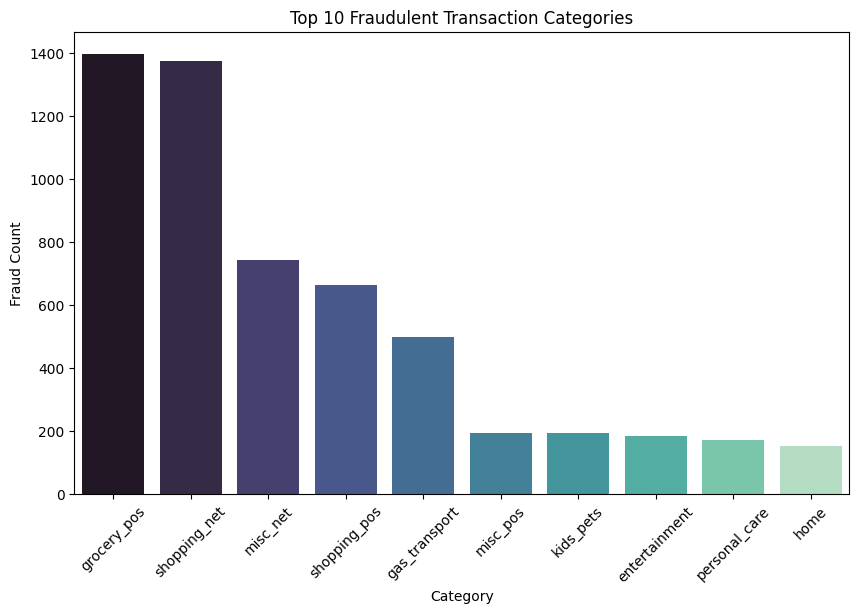

In [225]:
# Visualize the Count of fraudulent transactions by category

plt.figure(figsize=(10, 6))
sns.barplot(x='category', y='count', data=fraud_cat, palette='mako', order=fraud_cat['category'])
plt.xticks(rotation=45)
plt.title('Top 10 Fraudulent Transaction Categories')
plt.xlabel('Category')
plt.ylabel('Fraud Count')
plt.show()

Most fraud transactions are either Online or POS (likely card skimming). The top 3 most fraudulent categories are:
- Grocery_POS (Point of Sale transactions at grocery stores)
- Shopping_Net (Online shopping transactions)
- Misc_Net (Miscellaneous online transactions)

#### Frequent Victims

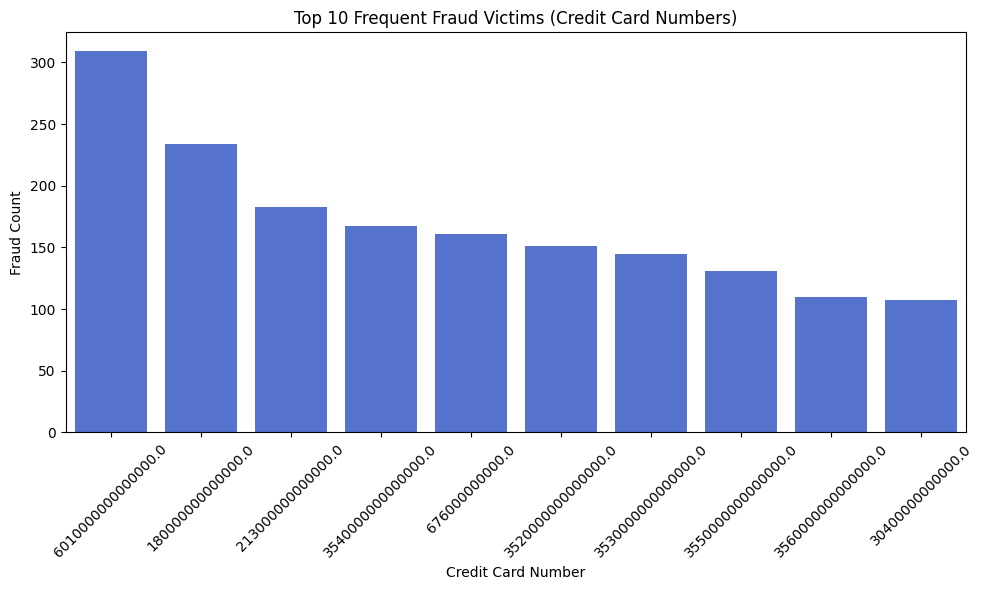

In [226]:
# Frequent Victims (Credit Card Numbers)
victims = df[df['is_fraud'] == 1]['cc_num'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=victims.index.astype(str), y=victims.values, color='RoyalBlue')
plt.title('Top 10 Frequent Fraud Victims (Credit Card Numbers)')
plt.xlabel('Credit Card Number')
plt.ylabel('Fraud Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Certain credit card numbers have been frequently used in fraudulent transactions, indicating they might be compromised or part of a larger fraud scheme.

#### Top 10 Cities for Fraudulent Transactions

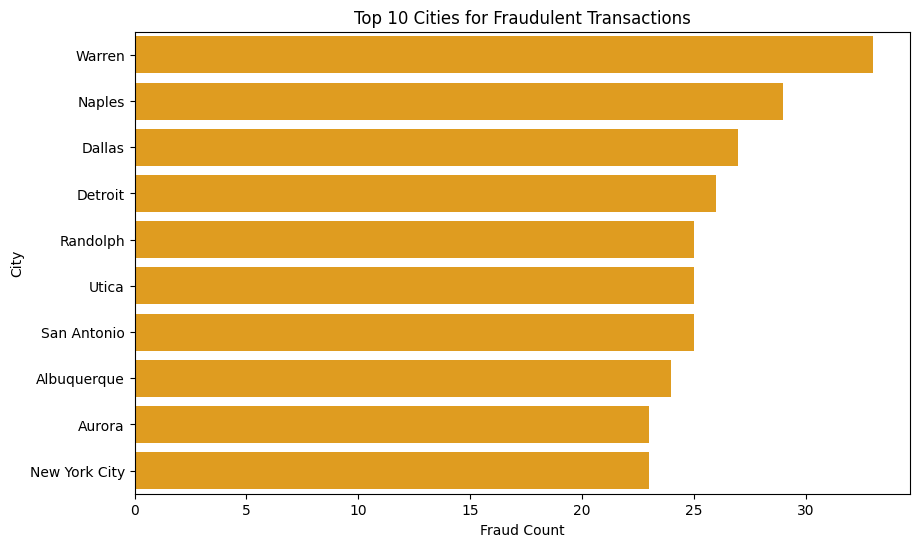

In [227]:
# Top Merchants for Fraudulent Transactions
fraud_cities = df[df['is_fraud'] == 1]['city'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=fraud_cities.values, y=fraud_cities.index, color='Orange')
plt.title('Top 10 Cities for Fraudulent Transactions')
plt.xlabel('Fraud Count')
plt.ylabel('City')
plt.show()

Certain cities have been targeted by fraudsters multiple times, possibly due to their inadequate security measures

#### Fraudulent Transactions by Population Size

In [228]:
# Create bins for city population to group data
df['city_pop_bin'] = pd.qcut(df['city_pop'], q=10, duplicates='drop')  # 10 quantile-based bins

# Calculate fraud percentage for each population bin
fraud_by_city_pop = df.groupby('city_pop_bin')['is_fraud'].mean() * 100
fraud_by_city_pop = fraud_by_city_pop.reset_index()
fraud_by_city_pop.columns = ['city_pop_bin', 'fraud_percentage']

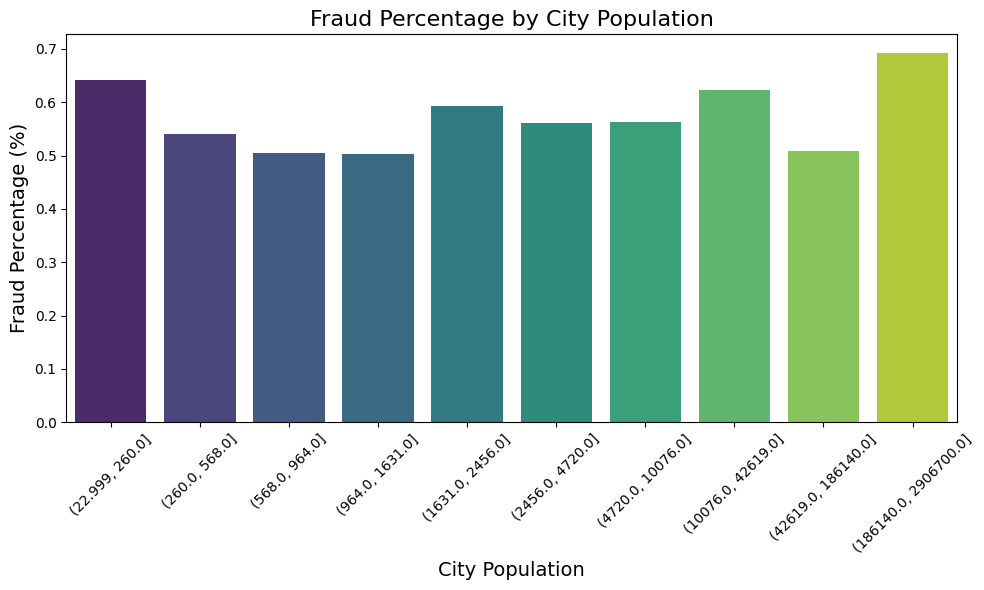

In [229]:
# Set up the plot
plt.figure(figsize=(10, 6))
sns.barplot(x='city_pop_bin', y='fraud_percentage', data=fraud_by_city_pop, palette='viridis')

# Add labels and title
plt.title('Fraud Percentage by City Population', fontsize=16)
plt.xlabel('City Population', fontsize=14)
plt.ylabel('Fraud Percentage (%)', fontsize=14)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Show the plot
plt.tight_layout()
plt.show()

Upon analyzing the fraud rate across different population groups, it was observed that the fraud percentage does not exhibit a clear, consistent trend when compared to population size. Specifically:

- The fraud rate was about 0.70% for populations above 186,000.
- The fraud rate was 0.65% for populations below 260.
- The fraud rate was 0.60% for populations between 10,000 and 42,600.

These findings suggest no clear or logical pattern between population size and fraud rate, which could be indicative of data inconsistencies or other factors affecting fraud that are not captured by population size alone. The lack of a visible trend led to the decision to drop this analysis from the study.

Future analysis may focus on other factors or variables that could provide a stronger, more reliable link to fraud detection.

#### Top 10 Merchants for Fraudulent Transactions

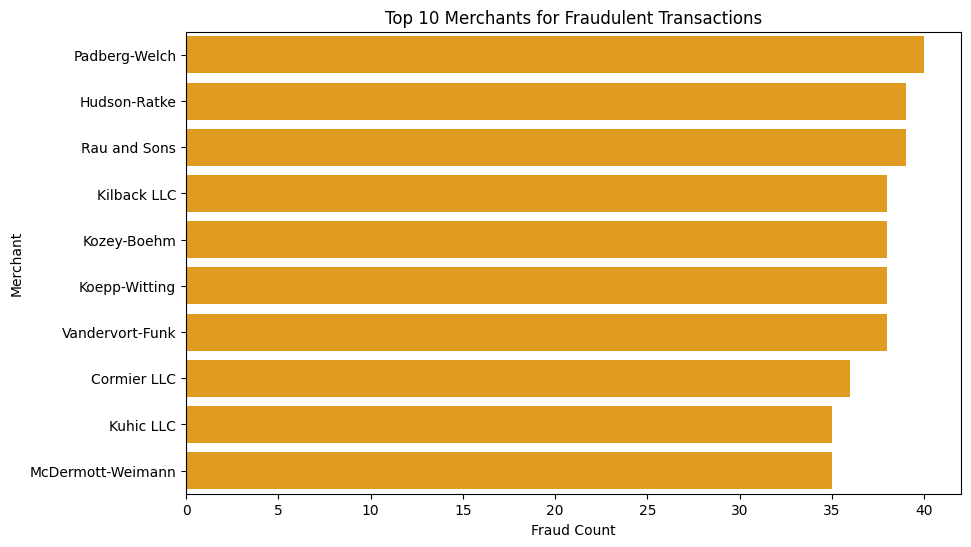

In [230]:
# Top Merchants for Fraudulent Transactions
fraud_merchants = df[df['is_fraud'] == 1]['merchant'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=fraud_merchants.values, y=fraud_merchants.index, color='Orange')
plt.title('Top 10 Merchants for Fraudulent Transactions')
plt.xlabel('Fraud Count')
plt.ylabel('Merchant')
plt.show()

Certain merchants have a disproportionately high number of fraudulent transactions, indicating possible vulnerabilities in their payment security.

#### Top 10 Professions for Fraudulent Transactions

In [231]:
df[df['is_fraud'] == 1]['job'].value_counts()

job
Surveyor, land/geomatics                50
Materials engineer                      50
Exhibition designer                     44
Financial trader                        43
Mechanical engineer                     41
                                        ..
Chartered loss adjuster                  3
Statistician                             3
English as a second language teacher     2
Contractor                               2
Optometrist                              2
Name: count, Length: 396, dtype: int64

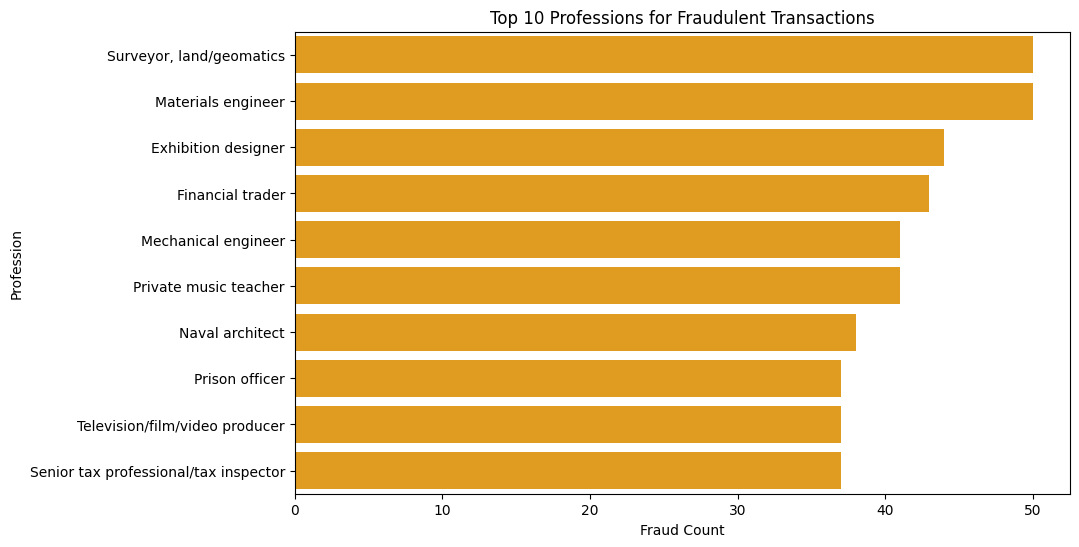

In [232]:
# Top Professions that are targeted by fraudsters
fraud_job = df[df['is_fraud'] == 1]['job'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=fraud_job.values, y=fraud_job.index, color='Orange')
plt.title('Top 10 Professions for Fraudulent Transactions')
plt.xlabel('Fraud Count')
plt.ylabel('Profession')
plt.show()

Some professions experience more fraudulent transactions than others, which may be due to lifestyle, spending patterns, or accessibility to financial data.

## Feature Engineering - 1

In [233]:
# Convert Transaction Date, DOB to Date/Time Format
df["trans_date_trans_time"] = pd.to_datetime(df["trans_date_trans_time"], dayfirst=True)
df["dob"] = pd.to_datetime(df["dob"], dayfirst=True)

In [234]:
# Add age column based on "dob" column
df['age'] = dt.date.today().year - df['dob'].dt.year

# Extract Hour, Day of the week and Month
df['hour'] = pd.to_datetime(df['trans_date_trans_time'], dayfirst=True).dt.hour
df['day_of_week'] = pd.to_datetime(df['trans_date_trans_time'], dayfirst=True).dt.dayofweek
df['month'] = df['trans_date_trans_time'].dt.month

In [235]:
df['year'] = df['trans_date_trans_time'].dt.year
df['minute'] = df['trans_date_trans_time'].dt.minute
df['second'] = df['trans_date_trans_time'].dt.second

In [236]:
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,merch_long,is_fraud,city_pop_bin,age,hour,day_of_week,month,year,minute,second
0,2019-01-01 00:00:00,2.700000e+15,"Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,-82.048315,0,"(2456.0, 4720.0]",37,0,1,1,2019,0,0
1,2019-01-01 00:00:00,6.300000e+11,"Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,-118.186462,0,"(22.999, 260.0]",47,0,1,1,2019,0,0
2,2019-01-01 00:00:00,3.890000e+13,Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,-112.154481,0,"(2456.0, 4720.0]",63,0,1,1,2019,0,0
3,2019-01-01 00:01:00,3.530000e+15,"Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,-112.561071,0,"(1631.0, 2456.0]",58,0,1,1,2019,1,0
4,2019-01-01 00:03:00,3.760000e+14,Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,-78.632459,0,"(22.999, 260.0]",39,0,1,1,2019,3,0


In [237]:
# The distance between the cardholder's home location and the merchant's location.
from geopy.distance import geodesic
def calculate_distance(row):
    cardholder_location = (row['lat'], row['long'])
    merchant_location = (row['merch_lat'], row['merch_long'])
    return round(geodesic(cardholder_location, merchant_location).km)

df['distance_from_home'] = df.apply(calculate_distance, axis=1)

In [238]:
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,is_fraud,city_pop_bin,age,hour,day_of_week,month,year,minute,second,distance_from_home
0,2019-01-01 00:00:00,2.700000e+15,"Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,0,"(2456.0, 4720.0]",37,0,1,1,2019,0,0,79
1,2019-01-01 00:00:00,6.300000e+11,"Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,0,"(22.999, 260.0]",47,0,1,1,2019,0,0,30
2,2019-01-01 00:00:00,3.890000e+13,Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,0,"(2456.0, 4720.0]",63,0,1,1,2019,0,0,108
3,2019-01-01 00:01:00,3.530000e+15,"Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,0,"(1631.0, 2456.0]",58,0,1,1,2019,1,0,96
4,2019-01-01 00:03:00,3.760000e+14,Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,0,"(22.999, 260.0]",39,0,1,1,2019,3,0,78


In [239]:
# Distribution of 'Distance from Home' feature
round(df['distance_from_home'].describe(),2)

count    1048575.00
mean          76.10
std           29.09
min            0.00
25%           55.00
50%           78.00
75%           98.00
max          152.00
Name: distance_from_home, dtype: float64

## Exploratory Data Analysis - 2

#### Age vs Fraud

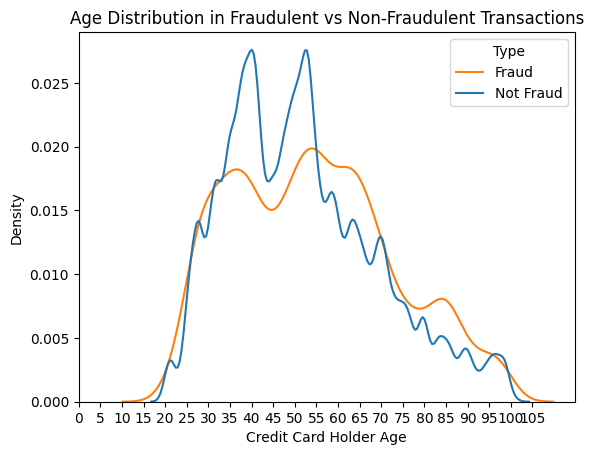

In [240]:
# Age vs Fraud
df['age'] = dt.date.today().year - df['dob'].dt.year
sns.kdeplot(x='age',data=df, hue='is_fraud', common_norm=False)
plt.xlabel('Credit Card Holder Age')
plt.ylabel('Density')
plt.xticks(np.arange(0,110,5))
plt.title('Age Distribution in Fraudulent vs Non-Fraudulent Transactions')
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])

The age distribution is visibly different between 2 transaction types. In normal transactions, there are 2 peaks at the age of 37-38 and 49-50, while in fraudulent transactions, the age distribution is a little smoother and the second peak does include a wider age group from 50-65. This does suggest that older people are potentially more prone to fraud

#### Time of the Day vs Fraud

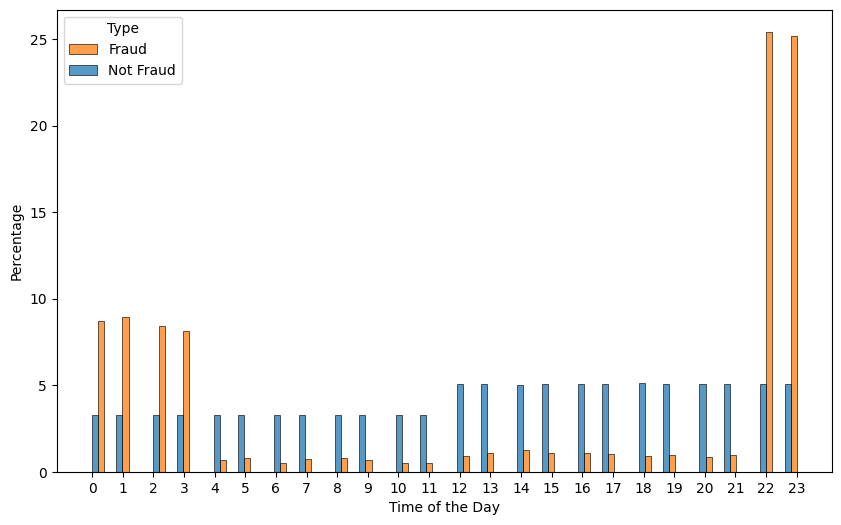

In [241]:
# Time of the day vs Faud
plt.figure(figsize=(10,6))
df['hour']=df['trans_date_trans_time'].dt.hour
sns.histplot(data=df, x="hour", hue="is_fraud", common_norm=False,stat='percent',multiple='dodge',binwidth=0.4)
plt.ylabel('Percentage')
plt.xlabel('Time of the Day')
plt.xticks(np.arange(0,24))
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])

While normal transactions distribute more or less equally throughout the day, fraudulent payments happen disproportionately around midnight when most people are asleep

#### Day of the Week vs Fraud

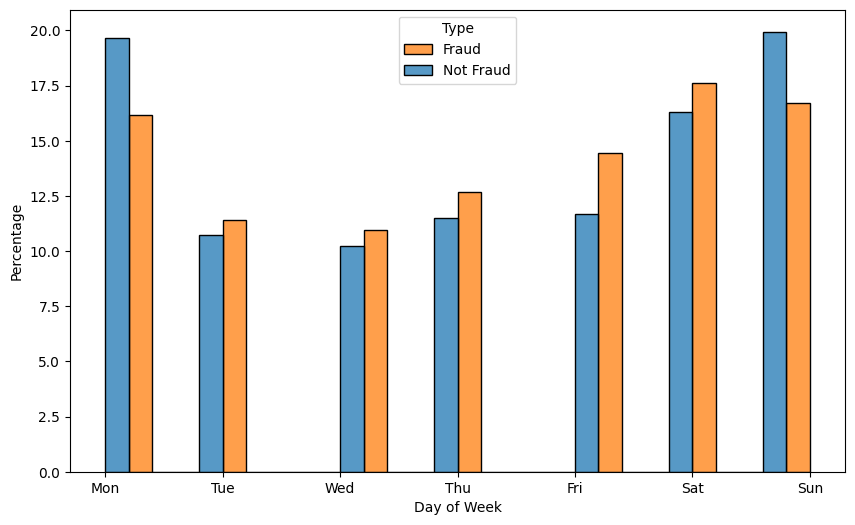

In [242]:
# Day of Week vs Fraud
plt.figure(figsize=(10, 6))
df['day'] = df['trans_date_trans_time'].dt.dayofweek
sns.histplot(data=df, x="day", hue="is_fraud", common_norm=False,stat='percent',multiple='dodge', binwidth=0.4)
plt.xticks(ticks=np.arange(0,7), labels=["Mon","Tue","Wed","Thu","Fri","Sat","Sun"])
plt.ylabel('Percentage')
plt.xlabel('Day of Week')
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])

Normal transactions tend to happen more often on Monday and Sunday while fraudulent ones tend to spread out more evenly throughout the week.

#### Month vs Fraud

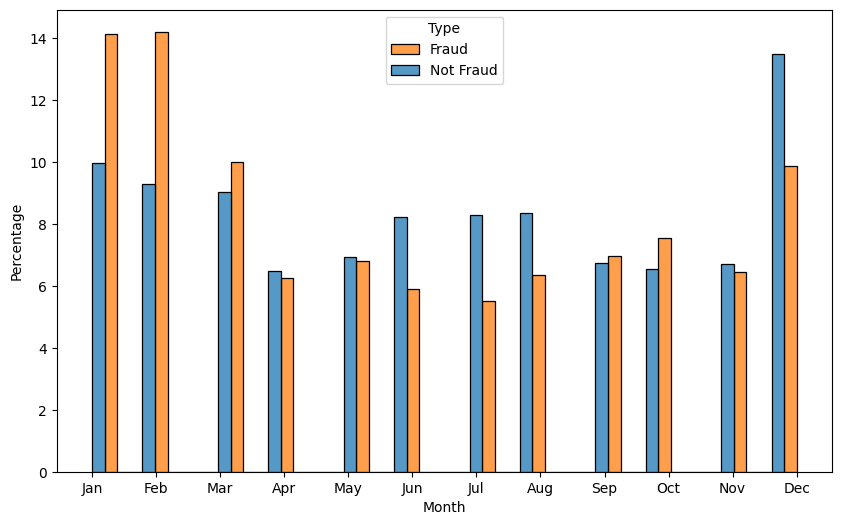

In [243]:
# Month vs Fraud
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="month", hue="is_fraud", common_norm=False,stat='percent',multiple='dodge', binwidth=0.4)
plt.ylabel('Percentage')
plt.xlabel('Month')
plt.xticks(ticks=np.arange(1,13,1), labels=["Jan","Feb","Mar","Apr","May","Jun","Jul",'Aug','Sep','Oct','Nov','Dec'])
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])

While normal payments peak around December and then in June, July and August, fraudulent transactions are more concentrated in Jan-May. There is a clear seasonal trend.

#### Distance vs Fraud

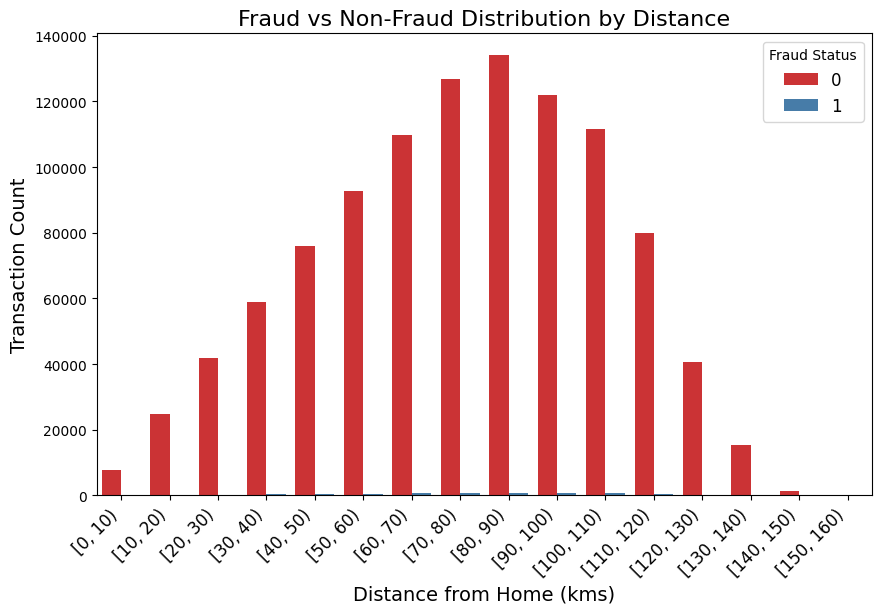

In [244]:
# Define the bins for the distance
bins = range(0, 161, 10)  # Bins from 0 to 150, with a width of 10 km

# Create a new column 'distance_bin' that contains the bin each transaction falls into
df['distance_bin'] = pd.cut(df['distance_from_home'], bins=bins, right=False)

plt.figure(figsize=(10, 6))
sns.countplot(x='distance_bin', hue='is_fraud', data=df, palette="Set1")
plt.title("Fraud vs Non-Fraud Distribution by Distance", fontsize=16)
plt.xlabel("Distance from Home (kms)", fontsize=14)
plt.ylabel("Transaction Count", fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.legend(title='Fraud Status', loc='upper right', fontsize=12)


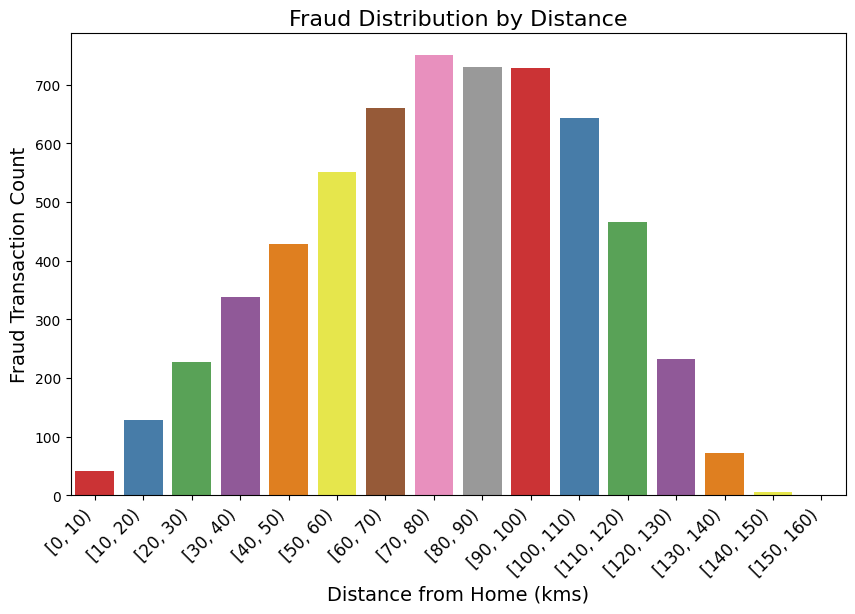

In [245]:
# Filter the DataFrame to include only fraud cases
df_fraud = df[df['is_fraud'] == 1]

plt.figure(figsize=(10, 6))
sns.countplot(x='distance_bin', data=df_fraud, palette="Set1")
plt.title("Fraud Distribution by Distance", fontsize=16)
plt.xlabel("Distance from Home (kms)", fontsize=14)
plt.ylabel("Fraud Transaction Count", fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.show()

- The distribution of fraud cases by distance from home follows a near-normal distribution, with the highest concentration of fraud cases occurring within the 30 km to 120 km range.

- This suggests that fraudulent transactions tend to occur more frequently at these moderate distances, rather than closer to home or far away. This could indicate that fraudsters might prefer a balance between proximity and distance to avoid detection.

#### Distribution of Distance from Home vs Categories 

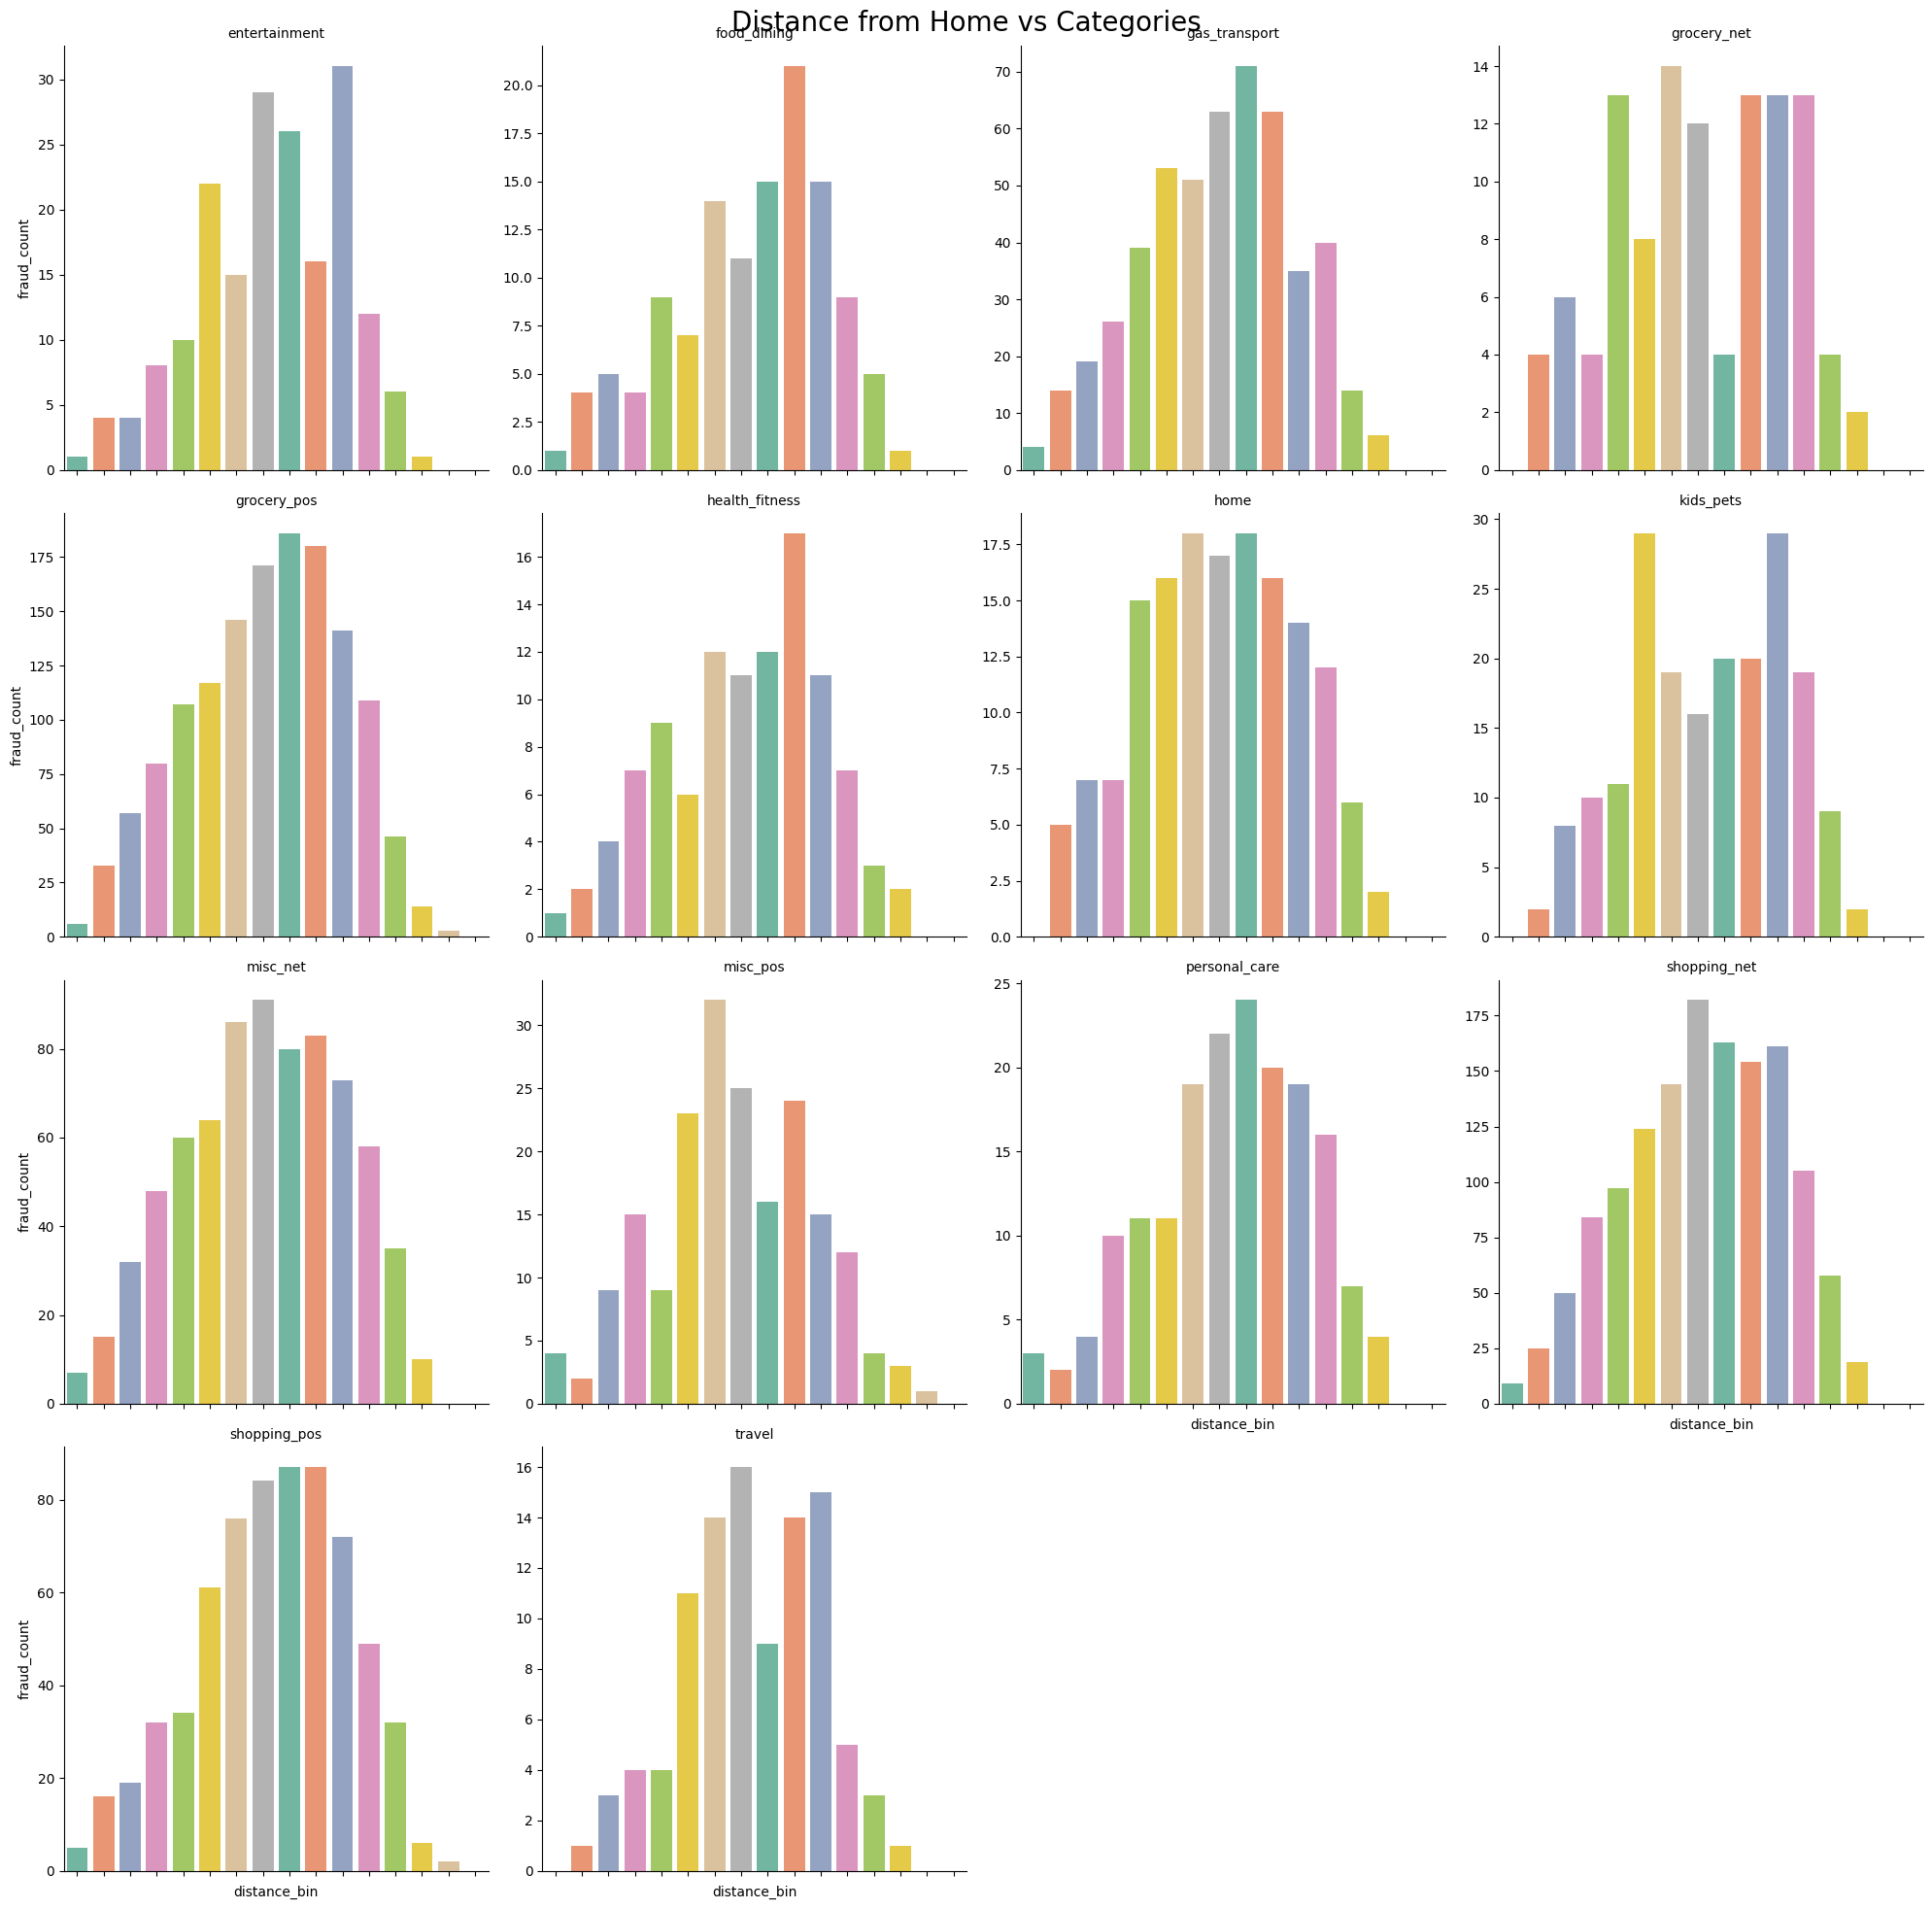

In [246]:
# Create a new column 'distance_bin' that contains the bin each fraud transaction falls into
df_fraud['distance_bin'] = pd.cut(df_fraud['distance_from_home'], bins=bins, right=False)

# Group by category and distance_bin to get fraud counts
fraud_counts = df_fraud.groupby(['category', 'distance_bin']).size().reset_index(name='fraud_count')

# Create the FacetGrid to display each category in a separate subplot
g = sns.FacetGrid(fraud_counts, col="category", col_wrap=4, height=5, sharey=False)
g.map(sns.barplot, 'distance_bin', 'fraud_count', palette="Set2")

#g.set_axis_labels("Distance from Home (km)", "Fraud Count")
g.set_titles("{col_name}")
g.set_xticklabels(rotation=45, ha='right')
g.fig.suptitle("Distance from Home vs Categories", fontsize=20)
plt.tight_layout()

## Feature Engineering - 2

In [247]:
# Calculate fraud rate by category
fraud_rate_by_category = df.groupby('category')['is_fraud'].mean().reset_index()
fraud_rate_by_category.columns = ['category', 'fraud_rate']
fraud_rate_by_category

,category,fraud_rate
0,entertainment,0.002435
1,food_dining,0.001634
2,gas_transport,0.004679
3,grocery_net,0.002996
4,grocery_pos,0.013973
5,health_fitness,0.001499
6,home,0.001536
7,kids_pets,0.002122
8,misc_net,0.014526
9,misc_pos,0.003008


In [248]:
# Merge fraud rate with the dataset
df = df.merge(fraud_rate_by_category, on='category')
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,hour,day_of_week,month,year,minute,second,distance_from_home,day,distance_bin,fraud_rate
0,2019-01-01 00:00:00,2.700000e+15,"Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,0,1,1,2019,0,0,79,1,"[70, 80)",0.014526
1,2019-01-01 00:00:00,6.300000e+11,"Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,0,1,1,2019,0,0,30,1,"[30, 40)",0.013973
2,2019-01-01 00:00:00,3.890000e+13,Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,0,1,1,2019,0,0,108,1,"[100, 110)",0.002435
3,2019-01-01 00:01:00,3.530000e+15,"Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,0,1,1,2019,1,0,96,1,"[90, 100)",0.004679
4,2019-01-01 00:03:00,3.760000e+14,Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,0,1,1,2019,3,0,78,1,"[70, 80)",0.003008


In [249]:
# Create a risk score columns
df['risk_score'] = df['fraud_rate'] * df['amt']

# Normalize risk score to a range of 0 to 1
df['risk_score_norm'] = (df['risk_score'] - df['risk_score'].min()) / (df['risk_score'].max() - df['risk_score'].min())

In [250]:
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,month,year,minute,second,distance_from_home,day,distance_bin,fraud_rate,risk_score,risk_score_norm
0,2019-01-01 00:00:00,2.700000e+15,"Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,1,2019,0,0,79,1,"[70, 80)",0.014526,0.072193,0.000425
1,2019-01-01 00:00:00,6.300000e+11,"Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,1,2019,0,0,30,1,"[30, 40)",0.013973,1.498339,0.008989
2,2019-01-01 00:00:00,3.890000e+13,Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,1,2019,0,0,108,1,"[100, 110)",0.002435,0.535928,0.003209
3,2019-01-01 00:01:00,3.530000e+15,"Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,1,2019,1,0,96,1,"[90, 100)",0.004679,0.210561,0.001255
4,2019-01-01 00:03:00,3.760000e+14,Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,1,2019,3,0,78,1,"[70, 80)",0.003008,0.126221,0.000749


In [251]:
# Average risk score by category
risk_score_by_category = df.groupby('category')['risk_score_norm'].mean().reset_index()
print(risk_score_by_category.sort_values(by='risk_score_norm', ascending=False))

          category  risk_score_norm
4      grocery_pos         0.009807
11    shopping_net         0.009249
8         misc_net         0.007066
12    shopping_pos         0.003332
13          travel         0.002026
2    gas_transport         0.001773
9         misc_pos         0.001121
3      grocery_net         0.000958
0    entertainment         0.000929
7        kids_pets         0.000724
10   personal_care         0.000665
6             home         0.000528
1      food_dining         0.000493
5   health_fitness         0.000478


In [252]:
high_risk_threshold = df['risk_score_norm'].quantile(0.99)
medium_risk_threshold = df['risk_score_norm'].quantile(0.90)

print("High Risk Threshold :", high_risk_threshold)
print("Medium Risk Threshold :", medium_risk_threshold)

High Risk Threshold : 0.03242477118156554
Medium Risk Threshold : 0.008161438423891788


In [253]:
# Create 'risk level' column and initialize all values as 'low'
df['risk_level'] = 'low'

# Update 'risk_level' to 'medium' / 'high' where risk score exceeds the set threshold
df.loc[df['risk_score_norm'] > medium_risk_threshold, 'risk_level'] = 'medium'
df.loc[df['risk_score_norm'] > high_risk_threshold, 'risk_level'] = 'high'

In [254]:
# Drop interim columns
df = df.drop(columns=['risk_score_norm', 'risk_score', 'fraud_rate'])

In [255]:
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,hour,day_of_week,month,year,minute,second,distance_from_home,day,distance_bin,risk_level
0,2019-01-01 00:00:00,2.700000e+15,"Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,0,1,1,2019,0,0,79,1,"[70, 80)",low
1,2019-01-01 00:00:00,6.300000e+11,"Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,0,1,1,2019,0,0,30,1,"[30, 40)",medium
2,2019-01-01 00:00:00,3.890000e+13,Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,0,1,1,2019,0,0,108,1,"[100, 110)",low
3,2019-01-01 00:01:00,3.530000e+15,"Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,0,1,1,2019,1,0,96,1,"[90, 100)",low
4,2019-01-01 00:03:00,3.760000e+14,Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,0,1,1,2019,3,0,78,1,"[70, 80)",low


In [256]:
# Average transaction value by category when the transaction is Legitimate
df[df['is_fraud'] == 0].groupby('category')['amt'].mean()

category
entertainment      63.077931
food_dining        51.016953
gas_transport      63.661447
grocery_net        53.864175
grocery_pos       114.221897
health_fitness     54.183326
home               57.851759
kids_pets          57.591832
misc_net           70.553981
misc_pos           62.180528
personal_care      48.038042
shopping_net       72.296751
shopping_pos       73.652072
travel            111.560759
Name: amt, dtype: float64

In [257]:
# Average transaction value by category when the transaction is Fraudulent
df[df['is_fraud'] == 1].groupby('category')['amt'].mean()

category
entertainment      507.769027
food_dining        119.789339
gas_transport       12.336305
grocery_net         12.444182
grocery_pos        311.825723
health_fitness      20.292019
home               257.827255
kids_pets           18.030052
misc_net           796.971038
misc_pos           192.133351
personal_care       26.444767
shopping_net      1000.046989
shopping_pos       877.909849
travel               8.999800
Name: amt, dtype: float64

In [258]:
# Count of category by Fraudulent transactions
df[df['is_fraud'] == 1].groupby('category')['amt'].count()

category
entertainment      185
food_dining        121
gas_transport      498
grocery_net        110
grocery_pos       1396
health_fitness     104
home               153
kids_pets          194
misc_net           742
misc_pos           194
personal_care      172
shopping_net      1375
shopping_pos       662
travel             100
Name: amt, dtype: int64

In [259]:
# Transactions during odd hours are more suspicious.
df['is_odd_hour'] = df['hour'].apply(lambda x: 1 if x in [0, 1, 2, 3, 4, 5] else 0)

# High-value transactions are more likely to be fraudulent.
high_value_threshold = df['amt'].quantile(0.95)  # 95th percentile of transaction amounts
df['high_value'] = df.apply(lambda row: 1 if row['amt'] > high_value_threshold else 0, axis=1)

df['flagged'] = df.apply(lambda row: 1 if row['high_value'] == 1 and row['is_odd_hour'] == 1 else 0, axis=1)

In [260]:
# Drop interim columns
df = df.drop(columns=['is_odd_hour', 'high_value'])

In [261]:
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,day_of_week,month,year,minute,second,distance_from_home,day,distance_bin,risk_level,flagged
0,2019-01-01 00:00:00,2.700000e+15,"Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,1,1,2019,0,0,79,1,"[70, 80)",low,0
1,2019-01-01 00:00:00,6.300000e+11,"Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,1,1,2019,0,0,30,1,"[30, 40)",medium,0
2,2019-01-01 00:00:00,3.890000e+13,Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,1,1,2019,0,0,108,1,"[100, 110)",low,1
3,2019-01-01 00:01:00,3.530000e+15,"Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,1,1,2019,1,0,96,1,"[90, 100)",low,0
4,2019-01-01 00:03:00,3.760000e+14,Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,1,1,2019,3,0,78,1,"[70, 80)",low,0


In [262]:
# Frequent online transactions may indicate fraudulent activity.
df = df.sort_values(by=['cc_num', 'trans_date_trans_time'])
df['prev_trans_time'] = df.groupby('cc_num')['trans_date_trans_time'].shift(1)
df['time_since_last_trans'] = (df['trans_date_trans_time'] - df['prev_trans_time']).dt.total_seconds() / 3600
df['frequent'] = df.apply(lambda row: 1 if row['time_since_last_trans'] < 6 else 0, axis=1)

In [263]:
# Drop interim columns
df = df.drop(columns=['prev_trans_time', 'time_since_last_trans'])

In [264]:
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,month,year,minute,second,distance_from_home,day,distance_bin,risk_level,flagged,frequent
1017,2019-01-01 12:47:00,6.041621e+10,"Jones, Sawayn and Romaguera",misc_net,7.27,Mary,Diaz,F,9886 Anita Drive,Fort Washakie,...,1,2019,47,0,128,1,"[120, 130)",low,0,0
2724,2019-01-02 08:44:00,6.041621e+10,Berge LLC,gas_transport,52.94,Mary,Diaz,F,9886 Anita Drive,Fort Washakie,...,1,2019,44,0,110,2,"[110, 120)",low,0,0
2726,2019-01-02 08:47:00,6.041621e+10,Luettgen PLC,gas_transport,82.08,Mary,Diaz,F,9886 Anita Drive,Fort Washakie,...,1,2019,47,0,22,2,"[20, 30)",low,0,1
2882,2019-01-02 12:38:00,6.041621e+10,Daugherty LLC,kids_pets,34.79,Mary,Diaz,F,9886 Anita Drive,Fort Washakie,...,1,2019,38,0,87,2,"[80, 90)",low,0,1
2907,2019-01-02 13:10:00,6.041621e+10,Beier and Sons,home,27.18,Mary,Diaz,F,9886 Anita Drive,Fort Washakie,...,1,2019,10,0,74,2,"[70, 80)",low,0,1


In [265]:
# Some merchants may be more prone to fraud.
fraud_by_merchant = df.groupby('merchant')['is_fraud'].sum().reset_index()
fraud_by_merchant.columns = ['merchant', 'merch_fraud_count']
df = df.merge(fraud_by_merchant, on='merchant')

# Flag merchants with >10 fraud cases
df['is_high_risk_merchant'] = df['merch_fraud_count'].apply(lambda x: 1 if x > 10 else 0)  

In [266]:
(fraud_by_merchant['merch_fraud_count'] > 10).sum()

np.int64(198)

In [267]:
# Drop interim columns
df = df.drop(columns=['merch_fraud_count'])

In [268]:
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,year,minute,second,distance_from_home,day,distance_bin,risk_level,flagged,frequent,is_high_risk_merchant
0,2019-01-01 12:47:00,6.041621e+10,"Jones, Sawayn and Romaguera",misc_net,7.27,Mary,Diaz,F,9886 Anita Drive,Fort Washakie,...,2019,47,0,128,1,"[120, 130)",low,0,0,1
1,2019-01-02 08:44:00,6.041621e+10,Berge LLC,gas_transport,52.94,Mary,Diaz,F,9886 Anita Drive,Fort Washakie,...,2019,44,0,110,2,"[110, 120)",low,0,0,0
2,2019-01-02 08:47:00,6.041621e+10,Luettgen PLC,gas_transport,82.08,Mary,Diaz,F,9886 Anita Drive,Fort Washakie,...,2019,47,0,22,2,"[20, 30)",low,0,1,0
3,2019-01-02 12:38:00,6.041621e+10,Daugherty LLC,kids_pets,34.79,Mary,Diaz,F,9886 Anita Drive,Fort Washakie,...,2019,38,0,87,2,"[80, 90)",low,0,1,0
4,2019-01-02 13:10:00,6.041621e+10,Beier and Sons,home,27.18,Mary,Diaz,F,9886 Anita Drive,Fort Washakie,...,2019,10,0,74,2,"[70, 80)",low,0,1,0


In [269]:
# Cardholders with a history of fraud are more likely to be involved in future fraud.
fraud_by_cardholder = df.groupby('cc_num')['is_fraud'].sum().reset_index()
fraud_by_cardholder.columns = ['cc_num', 'card_fraud_count']

fraud_by_cardholder.head()

,cc_num,card_fraud_count
0,6.041621e+10,9
1,6.042293e+10,12
2,6.042310e+10,10
3,6.042785e+10,14
4,6.048700e+10,0


In [270]:
print("Number of Unique CardHolders :",df['cc_num'].nunique())
print("Number of CardHolders who have experienced Fraud :",(fraud_by_cardholder['card_fraud_count'] > 1).sum())

Number of Unique CardHolders : 320
Number of CardHolders who have experienced Fraud : 253


In [271]:
# # Drop interim columns
# df = df.drop(columns=['card_fraud_count'])

In [272]:
# df.head()

In [273]:
# df.columns

In [274]:
# df.head()

# PART 2

## Feature Scaling

#### Drop Unwanted Columns

In [275]:
df = df.drop(columns=['trans_date_trans_time', 'first', 'last', 'gender', 'street', 'city', 
                      'state', 'zip', 'lat', 'long', 'city_pop', 'dob', 'trans_num', 'unix_time', 
                      'merch_lat', 'merch_long', 'city_pop_bin', 'distance_from_home'])

In [276]:
df.head()

,cc_num,merchant,category,amt,job,is_fraud,age,hour,day_of_week,month,year,minute,second,day,distance_bin,risk_level,flagged,frequent,is_high_risk_merchant
0,6.041621e+10,"Jones, Sawayn and Romaguera",misc_net,7.27,Information systems manager,0,39,12,1,1,2019,47,0,1,"[120, 130)",low,0,0,1
1,6.041621e+10,Berge LLC,gas_transport,52.94,Information systems manager,0,39,8,2,1,2019,44,0,2,"[110, 120)",low,0,0,0
2,6.041621e+10,Luettgen PLC,gas_transport,82.08,Information systems manager,0,39,8,2,1,2019,47,0,2,"[20, 30)",low,0,1,0
3,6.041621e+10,Daugherty LLC,kids_pets,34.79,Information systems manager,0,39,12,2,1,2019,38,0,2,"[80, 90)",low,0,1,0
4,6.041621e+10,Beier and Sons,home,27.18,Information systems manager,0,39,13,2,1,2019,10,0,2,"[70, 80)",low,0,1,0


In [277]:
df.shape

(1048575, 19)

In [278]:
# df.to_csv('FraudCleaned.csv')

#### Split data into train and test

In [279]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder
from category_encoders import CatBoostEncoder, BaseNEncoder
from sklearn.compose import ColumnTransformer

In [280]:
x = df.drop(columns=['is_fraud'])
y = df['is_fraud']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [281]:
print("Train Set Shape",x_train.shape, y_train.shape)
print("Test Set Shape",x_test.shape, y_test.shape)

Train Set Shape (838860, 18) (838860,)
Test Set Shape (209715, 18) (209715,)


#### Prepare data for Scaling and Encoding

In [282]:
df.columns

Index(['cc_num', 'merchant', 'category', 'amt', 'job', 'is_fraud', 'age',
       'hour', 'day_of_week', 'month', 'year', 'minute', 'second', 'day',
       'distance_bin', 'risk_level', 'flagged', 'frequent',
       'is_high_risk_merchant'],
      dtype='object')

In [283]:
df.dtypes

cc_num                    float64
merchant                   object
category                   object
amt                       float64
job                        object
is_fraud                    int64
age                         int32
hour                        int32
day_of_week                 int32
month                       int32
year                        int32
minute                      int32
second                      int32
day                         int32
distance_bin             category
risk_level                 object
flagged                     int64
frequent                    int64
is_high_risk_merchant       int64
dtype: object

In [284]:
df.describe(include=['O','category'])

,merchant,category,job,distance_bin,risk_level
count,1048575,1048575,1048575,1048575,1048575
unique,693,14,493,16,3
top,Kilback LLC,gas_transport,Film/video editor,"[80, 90)",low
freq,3521,106430,7940,134753,943718


In [285]:
df['category'].value_counts()

category
gas_transport     106430
grocery_pos        99906
home               99578
shopping_pos       94353
kids_pets          91404
shopping_net       78899
entertainment      75981
food_dining        74041
personal_care      73498
health_fitness     69362
misc_pos           64492
misc_net           51082
grocery_net        36719
travel             32830
Name: count, dtype: int64

In [286]:
# Prepare columns for encoding
num_cols = df.select_dtypes(include=[np.number]).columns.drop('is_fraud')
highCard_cols = ['merchant', 'job']
medCard_cols = ['category', 'distance_bin']
ord_cols = ['risk_level']

In [287]:
print("x_train columns:", x_train.columns)
print("Numeric Columns:", num_cols)
print("High Cardinality Columns:", highCard_cols)
print("Medium Cardinalty Columns:", medCard_cols)
print("Ordinal Columns:", ord_cols)

x_train columns: Index(['cc_num', 'merchant', 'category', 'amt', 'job', 'age', 'hour',
       'day_of_week', 'month', 'year', 'minute', 'second', 'day',
       'distance_bin', 'risk_level', 'flagged', 'frequent',
       'is_high_risk_merchant'],
      dtype='object')
Numeric Columns: Index(['cc_num', 'amt', 'age', 'hour', 'day_of_week', 'month', 'year',
       'minute', 'second', 'day', 'flagged', 'frequent',
       'is_high_risk_merchant'],
      dtype='object')
High Cardinality Columns: ['merchant', 'job']
Medium Cardinalty Columns: ['category', 'distance_bin']
Ordinal Columns: ['risk_level']


In [288]:
# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), num_cols),  # Scale numerical features
        ('ord', OrdinalEncoder(categories=[['low', 'medium', 'high']]), ord_cols),  # Ordinal encoding for 'risk_level'
        ('catboost', CatBoostEncoder(), highCard_cols),  # CatBoost encoding for high-cardinality columns
        ('basen', BaseNEncoder(base=4), medCard_cols)  # Base-N encoding for medium-cardinality columns
    ])

## Data Modeling

In [289]:
# Import Required Libraries
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as ImbPipeline

from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from imblearn.ensemble import EasyEnsembleClassifier, RUSBoostClassifier
from imblearn.ensemble import BalancedRandomForestClassifier, BalancedBaggingClassifier

from imblearn.over_sampling import SMOTE, ADASYN, BorderlineSMOTE
from imblearn.combine import SMOTETomek, SMOTEENN

from sklearn.metrics import roc_auc_score, classification_report

In [290]:
# Create a function to train and evaluate a model with optional resampling
def TrainEvaluate_model(model, resampler=None):
    
    if resampler:
        pipeline = ImbPipeline([
            ('preprocessor', preprocessor),
            ('resampler', resampler),
            ('classifier', model)
        ])
    else:
        pipeline = Pipeline([
            ('preprocessor', preprocessor),
            ('classifier', model)
        ])
    
    # Train the model
    pipeline.fit(x_train, y_train)
    
    # Evaluate the model
    y_pred = pipeline.predict(x_test)
       
    # Print results
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("ROC-AUC Score:", round(roc_auc_score(y_test, y_pred),2))
    
    return pipeline

In [291]:

def TrainTestEvaluate(model):
    # Create a pipeline
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])
    
    # Train the model
    pipeline.fit(x_train, y_train)
    
    # Evaluate the model
    y_predTest = pipeline.predict(x_test)
    y_predTrain = pipeline.predict(x_train)
       
    # Print TEST metrics
    print("Classification Report: TEST")
    print(classification_report(y_test, y_predTest))
    print("ROC-AUC Score:", round(roc_auc_score(y_test, y_predTest),2))
    print("")
    # Print TRAIN metrics
    print("Classification Report: TRAIN")
    print(classification_report(y_train, y_predTrain))
    print("ROC-AUC Score:", round(roc_auc_score(y_train, y_predTrain),2))
    
    return pipeline

### Explanation of Metrics

### **Precision**:
- **What it measures**: Precision measures how many of the predicted fraud cases are actually fraud.
- **Why it matters**: In fraud detection, false positives (legitimate transactions flagged as fraud) can lead to customer dissatisfaction and operational costs.


### **Recall**:
- **What it measures**: Recall measures how many of the actual fraud cases are correctly identified.
- **Why it matters**: Missing fraud cases (false negatives) can be costly for the business.


### **F1-Score**:
- **What it measures**: The F1-score is the harmonic mean of precision and recall.
- **Why it matters**: It balances precision and recall, which is critical in imbalanced datasets.


### **Accuracy**:
- **What it measures**: Accuracy measures the overall correctness of predictions.
- **Why it's misleading**: In highly imbalanced datasets (e.g., 99:1), a model that always predicts the majority class will have 99% accuracy but fail to detect any fraud.


### **ROC-AUC**:
- **What it measures**: ROC-AUC measures the model's ability to distinguish between the two classes across all thresholds.
- **Why it matters**: A high ROC-AUC indicates that the model ranks fraud cases higher than legitimate cases.


---

### **Trade-Offs**:
**Precision vs. Recall:**
Increasing recall (catching more fraud) often reduces precision (more false positives).The optimal balance depends on the business context (e.g., cost of fraud vs. cost of false positives).

## IMBLEARN MODELS

#### Easy Ensemble Classifier

In [ ]:
eecSM = TrainEvaluate_model(EasyEnsembleClassifier(), BorderlineSMOTE(random_state=42))

In [ ]:
eecAD = TrainEvaluate_model(EasyEnsembleClassifier(), ADASYN(random_state=42))

In [ ]:
eec = TrainEvaluate_model(EasyEnsembleClassifier(n_estimators=150,
                                                   sampling_strategy='not majority',
                                                   random_state=42))

#### RUS Boost

In [ ]:
rus = TrainEvaluate_model(RUSBoostClassifier(
                            n_estimators=200,
                            learning_rate=0.5,
                            sampling_strategy='not majority',
                            random_state=42))

In [ ]:
rus2 = TrainEvaluate_model(RUSBoostClassifier(
                            n_estimators=500,
                            learning_rate=0.5,
                            sampling_strategy=1.0,
                            random_state=42))

In [ ]:
rus3 = TrainEvaluate_model(RUSBoostClassifier(
                            n_estimators=600,
                            learning_rate=0.25,
                            sampling_strategy=0.7,
                            random_state=42))

#### Balanced RF Classifier

In [ ]:
brf = TrainEvaluate_model(BalancedRandomForestClassifier(
                            n_estimators=150,
                            sampling_strategy='not majority',
                            random_state=42))

In [ ]:
brf2 = TrainEvaluate_model(BalancedRandomForestClassifier(
                            n_estimators=500,
                            sampling_strategy=1.0,
                            random_state=42))

In [ ]:
brf3 = TrainEvaluate_model(BalancedRandomForestClassifier(
                            n_estimators=100,
                            sampling_strategy='not majority',
                            random_state=42))

#### Balanced Bagging Classifier

In [ ]:
bbc2 = TrainEvaluate_model(BalancedBaggingClassifier(
                            n_estimators=125,
                            sampling_strategy='auto',
                            random_state=42))

In [ ]:
bbc = TrainEvaluate_model(BalancedBaggingClassifier(
                            n_estimators=150,
                            sampling_strategy='not majority',
                            random_state=42))

In this study, multiple ensemble models were tested to handle the severe class imbalance in credit card fraud detection. The focus was on the F1-score, which balances precision (false alarm rate) and recall (fraud detection rate) to provide a practical trade-off for real-world deployment.

### ** Key Takeaways **
- Balanced Bagging Classifier is the best choice, as it maintains a strong fraud detection rate (recall: 0.80) while minimizing false positives (precision: 0.94).
- Balanced Random Forest is a close second, with a slightly lower recall but higher precision.
- Easy Ensemble and RUSBoost have poor metrics making it less reliable in practical applications.

To further optimize fraud detection, the next step is to experiment with resampling techniques and class weight stratergies using Scikit-Learn models

## FLAml

In [181]:
from flaml import AutoML

In [191]:
automl = AutoML()

import numpy as np

# Fit the AutoML model
automl.fit(x_train, y_train, task='classification', 
           time_budget=600, 
           verbose=1,
           metric='f1',
           eval_method='cv',
           n_splits=5,
           seed=42,
           early_stop=True,
           estimator_list=['xgboost'])

In [192]:
best_model = automl.model
print("Best model:", best_model)
print("Best hyperparameters:", automl.best_config)

Best model: <flaml.automl.model.XGBoostSklearnEstimator object at 0x000002A55E2D1BD0>
Best hyperparameters: {'n_estimators': 1504, 'max_leaves': 17, 'min_child_weight': np.float64(3.9303081325794498), 'learning_rate': np.float64(0.0901322721778827), 'subsample': np.float64(0.8843427952604754), 'colsample_bylevel': np.float64(0.9571023781817772), 'colsample_bytree': np.float64(0.9877878456495247), 'reg_alpha': np.float64(0.009754310579658875), 'reg_lambda': np.float64(0.02652491459474575)}


#### cola

In [194]:
# Define the hyperparameter search space
params_xgb = {
    'n_estimators': [100, 300, 500, 1000],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7, 9],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2],
    'scale_pos_weight': [90, 95, 99],  # Important for imbalanced data
}

# Convert the search space to FLAML's format
custom_hp = {
    "xgboost": {
        "n_estimators": {"domain": params_xgb['n_estimators'], "init_value": 100},
        "learning_rate": {"domain": params_xgb['learning_rate'], "init_value": 0.1},
        "max_depth": {"domain": params_xgb['max_depth'], "init_value": 5},
        "subsample": {"domain": params_xgb['subsample'], "init_value": 1.0},
        "colsample_bytree": {"domain": params_xgb['colsample_bytree'], "init_value": 1.0},
        "gamma": {"domain": params_xgb['gamma'], "init_value": 0},
        "scale_pos_weight": {"domain": params_xgb['scale_pos_weight'], "init_value": 90},
    }
}

# Initialize AutoML
automl = AutoML()

# Fit the model
automl.fit(x_train, y_train, task='classification', 
           time_budget=600,  # Time budget in seconds
           verbose=1,
           metric='f1',  # Metric to optimize
           eval_method='cv',  # Cross-validation
           n_splits=5,  # Number of CV folds
           seed=42,  # Random seed
           early_stop=True,  # Enable early stopping
           custom_hp=custom_hp,  # Pass custom hyperparameters
           estimator_list=['xgboost'])  # Use only XGBoost

TypeError: type list doesn't define __round__ method

### oth

In [197]:
custom_hp = {
    "xgboost": {
        "n_estimators": {"domain": 100, "low": 100, "high": 1000},  # Range for n_estimators
        "learning_rate": {"domain": 0.1, "low": 0.01, "high": 0.2},  # Range for learning_rate
        "max_depth": {"domain": 5, "low": 3, "high": 9},  # Range for max_depth
        "subsample": {"domain": 1.0, "low": 0.6, "high": 1.0},  # Range for subsample
        "colsample_bytree": {"domain": 1.0, "low": 0.6, "high": 1.0},  # Range for colsample_bytree
        "gamma": {"domain": 0, "low": 0, "high": 0.2},  # Range for gamma
        "scale_pos_weight": {"domain": 90, "low": 90, "high": 99},  # Range for scale_pos_weight
    }
}

# Initialize and fit AutoML
automl = AutoML()
automl.fit(x_train, y_train, task='classification', 
           time_budget=60,  # Shorter time budget for testing
           custom_hp=custom_hp,
           verbose=1,
           estimator_list=['xgboost'])

In [199]:
print("Best hyperparameters:", automl.best_config)

Best hyperparameters: {'max_leaves': 9, 'min_child_weight': np.float64(41.38326928527075), 'colsample_bylevel': 1.0, 'reg_alpha': np.float64(0.0028569773203480026), 'reg_lambda': np.float64(208.22702584859334), 'n_estimators': 100, 'learning_rate': 0.1, 'subsample': 1.0, 'colsample_bytree': 1.0, 'max_depth': 5, 'gamma': 0, 'scale_pos_weight': 90}


In [294]:
import optuna
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score

def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.2),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
        'gamma': trial.suggest_float('gamma', 0, 0.2),
        'scale_pos_weight': trial.suggest_float('scale_pos_weight', 1, 100),
    }
    model = XGBClassifier(**params)
    score = cross_val_score(model, x_train, y_train, scoring='f1', cv=5).mean()
    return score

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

print("Best hyperparameters:", study.best_params)

[I 2025-03-06 00:41:24,807] A new study created in memory with name: no-name-9fb3d079-a244-441c-9074-0909d93ab1ca
[W 2025-03-06 00:41:25,443] Trial 0 failed with parameters: {'n_estimators': 207, 'max_depth': 9, 'learning_rate': 0.07557657414650447, 'subsample': 0.8296278908978318, 'colsample_bytree': 0.603628002146521, 'gamma': 0.028854228803686578, 'scale_pos_weight': 29.396231314214273} because of the following error: ValueError('\nAll the 5 fits failed.\nIt is very likely that your model is misconfigured.\nYou can try to debug the error by setting error_score=\'raise\'.\n\nBelow are more details about the failures:\n--------------------------------------------------------------------------------\n5 fits failed with the following error:\nTraceback (most recent call last):\n  File "c:\\Users\\gamma\\AppData\\Local\\Programs\\Python\\Python313\\Lib\\site-packages\\sklearn\\model_selection\\_validation.py", line 866, in _fit_and_score\n    estimator.fit(X_train, y_train, **fit_params)\

ValueError: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\gamma\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\gamma\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
  File "c:\Users\gamma\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\sklearn.py", line 1580, in fit
    train_dmatrix, evals = _wrap_evaluation_matrices(
                           ~~~~~~~~~~~~~~~~~~~~~~~~~^
        missing=self.missing,
        ^^^^^^^^^^^^^^^^^^^^^
    ...<14 lines>...
        feature_types=self.feature_types,
        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
    )
    ^
  File "c:\Users\gamma\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\sklearn.py", line 603, in _wrap_evaluation_matrices
    train_dmatrix = create_dmatrix(
        data=X,
    ...<9 lines>...
        ref=None,
    )
  File "c:\Users\gamma\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\sklearn.py", line 1065, in _create_dmatrix
    return QuantileDMatrix(
        **kwargs, ref=ref, nthread=self.n_jobs, max_bin=self.max_bin
    )
  File "c:\Users\gamma\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
  File "c:\Users\gamma\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py", line 1573, in __init__
    self._init(
    ~~~~~~~~~~^
        data,
        ^^^^^
    ...<11 lines>...
        enable_categorical=enable_categorical,
        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
    )
    ^
  File "c:\Users\gamma\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py", line 1632, in _init
    it.reraise()
    ~~~~~~~~~~^^
  File "c:\Users\gamma\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py", line 569, in reraise
    raise exc  # pylint: disable=raising-bad-type
    ^^^^^^^^^
  File "c:\Users\gamma\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py", line 550, in _handle_exception
    return fn()
  File "c:\Users\gamma\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py", line 637, in <lambda>
    return self._handle_exception(lambda: self.next(input_data), 0)
                                          ~~~~~~~~~^^^^^^^^^^^^
  File "c:\Users\gamma\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\data.py", line 1402, in next
    input_data(**self.kwargs)
    ~~~~~~~~~~^^^^^^^^^^^^^^^
  File "c:\Users\gamma\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
  File "c:\Users\gamma\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py", line 617, in input_data
    new, cat_codes, feature_names, feature_types = _proxy_transform(
                                                   ~~~~~~~~~~~~~~~~^
        data,
        ^^^^^
    ...<2 lines>...
        self._enable_categorical,
        ^^^^^^^^^^^^^^^^^^^^^^^^^
    )
    ^
  File "c:\Users\gamma\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\data.py", line 1447, in _proxy_transform
    df, feature_names, feature_types = _transform_pandas_df(
                                       ~~~~~~~~~~~~~~~~~~~~^
        data, enable_categorical, feature_names, feature_types
        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
    )
    ^
  File "c:\Users\gamma\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\data.py", line 603, in _transform_pandas_df
    pandas_check_dtypes(data, enable_categorical)
    ~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\gamma\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\data.py", line 569, in pandas_check_dtypes
    _invalid_dataframe_dtype(data)
    ~~~~~~~~~~~~~~~~~~~~~~~~^^^^^^
  File "c:\Users\gamma\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\data.py", line 356, in _invalid_dataframe_dtype
    raise ValueError(msg)
ValueError: DataFrame.dtypes for data must be int, float, bool or category. When categorical type is supplied, the experimental DMatrix parameter`enable_categorical` must be set to `True`.  Invalid columns:merchant: object, category: object, job: object, distance_bin: category, risk_level: object


In [293]:
xgb = TrainTestEvaluate(XGBClassifier(n_estimators=100,  
                                        max_leaves=9,      
                                        min_child_weight=41.38,  
                                        learning_rate=0.10,
                                        scale_pos_weight=90,   
                                        subsample=1.0,           
                                        colsample_bylevel=1.0,  
                                        max_depth=5, 
                                        colsample_bytree=1.0,    
                                       ))

Classification Report: TEST
              precision    recall  f1-score   support

           0       1.00      0.98      0.99    208527
           1       0.18      0.94      0.31      1188

    accuracy                           0.98    209715
   macro avg       0.59      0.96      0.65    209715
weighted avg       1.00      0.98      0.98    209715

ROC-AUC Score: 0.96

Classification Report: TRAIN
              precision    recall  f1-score   support

           0       1.00      0.98      0.99    834042
           1       0.19      0.94      0.31      4818

    accuracy                           0.98    838860
   macro avg       0.59      0.96      0.65    838860
weighted avg       0.99      0.98      0.98    838860

ROC-AUC Score: 0.96


In [ ]:
Best hyperparameters: {'max_leaves': 9, 
                       'min_child_weight': np.float64(41.38326928527075), 
                       'colsample_bylevel': 1.0, 
                       'reg_alpha': np.float64(0.0028569773203480026), 
                       'reg_lambda': np.float64(208.22702584859334), 
                       'n_estimators': 100, 'learning_rate': 0.1, 'subsample': 1.0, 
                       'colsample_bytree': 1.0, 'max_depth': 5, 'gamma': 0,
                        'scale_pos_weight': 90}

Classification Report: TEST
              precision    recall  f1-score   support

           0       1.00      0.97      0.99    208527
           1       0.16      0.94      0.27      1188

    accuracy                           0.97    209715
   macro avg       0.58      0.95      0.63    209715
weighted avg       0.99      0.97      0.98    209715

ROC-AUC Score: 0.95

Classification Report: TRAIN
              precision    recall  f1-score   support

           0       1.00      0.97      0.99    834042
           1       0.16      0.94      0.28      4818

    accuracy                           0.97    838860
   macro avg       0.58      0.95      0.63    838860
weighted avg       0.99      0.97      0.98    838860

ROC-AUC Score: 0.95


## SK-LEARN MODELS WITH RESAMPLING

#### Bagging Classifier

In [292]:
Bagg = TrainEvaluate_model(BaggingClassifier())

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    208527
           1       0.94      0.79      0.86      1188

    accuracy                           1.00    209715
   macro avg       0.97      0.89      0.93    209715
weighted avg       1.00      1.00      1.00    209715

ROC-AUC Score: 0.89


In [85]:
Bagg2 = TrainEvaluate_model(BaggingClassifier(n_estimators=200))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    208527
           1       0.93      0.80      0.86      1188

    accuracy                           1.00    209715
   macro avg       0.97      0.90      0.93    209715
weighted avg       1.00      1.00      1.00    209715

ROC-AUC Score: 0.9


In [97]:
BaggSmote = TrainEvaluate_model(BaggingClassifier(), SMOTEENN(random_state=42))

AttributeError: 'super' object has no attribute '__sklearn_tags__'

In [99]:
BaggSmote = TrainEvaluate_model(BaggingClassifier(), ADASYN(random_state=42))

AttributeError: 'super' object has no attribute '__sklearn_tags__'

#### Stacking

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

base_learners = [
    ('bagging_dt', BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=100)),
    ('xgb', XGBClassifier())
]

Stk = TrainEvaluate_model(StackingClassifier(estimators=base_learners, final_estimator=XGBClassifier()))


In [87]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

base_learners = [
    ('bagging_dt', BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=100)),
    ('xgb', XGBClassifier())
]

Stk = TrainTestEvaluate(StackingClassifier(estimators=base_learners, final_estimator=XGBClassifier()))


Classification Report: TEST
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    208527
           1       0.94      0.80      0.87      1188

    accuracy                           1.00    209715
   macro avg       0.97      0.90      0.93    209715
weighted avg       1.00      1.00      1.00    209715

ROC-AUC Score: 0.9

Classification Report: TRAIN
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    834042
           1       0.98      0.88      0.93      4818

    accuracy                           1.00    838860
   macro avg       0.99      0.94      0.96    838860
weighted avg       1.00      1.00      1.00    838860

ROC-AUC Score: 0.94


In [88]:
from sklearn.ensemble import RandomForestClassifier

StkRF = TrainEvaluate_model(StackingClassifier(estimators=base_learners, final_estimator=RandomForestClassifier()))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    208527
           1       0.82      0.82      0.82      1188

    accuracy                           1.00    209715
   macro avg       0.91      0.91      0.91    209715
weighted avg       1.00      1.00      1.00    209715

ROC-AUC Score: 0.91


In [92]:
from sklearn.ensemble import RandomForestClassifier
base_learners = [
    ('lgbm', LGBMClassifier(
                            n_estimators=2000,
                            learning_rate=0.11,
                            max_depth=6,
                            class_weight="balanced",
                            force_row_wise=True,
                            verbosity=-1,
                            random_state=42
                        )),
    ('xgb', XGBClassifier(max_depth=6, 
                          n_estimators=2000, 
                          learning_rate = 0.11, 
                          n_jobs=4,
                          gamma=0.2, 
                          scale_pos_weight=99))
]

Stk_logbl24 = TrainTestEvaluate(StackingClassifier(estimators=base_learners, 
                                                  final_estimator=RandomForestClassifier(class_weight='balanced')))

Classification Report: TEST
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    208527
           1       0.93      0.83      0.88      1188

    accuracy                           1.00    209715
   macro avg       0.97      0.92      0.94    209715
weighted avg       1.00      1.00      1.00    209715

ROC-AUC Score: 0.92

Classification Report: TRAIN
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    834042
           1       0.97      0.94      0.96      4818

    accuracy                           1.00    838860
   macro avg       0.99      0.97      0.98    838860
weighted avg       1.00      1.00      1.00    838860

ROC-AUC Score: 0.97


In [115]:
base_learners = [
    ('lgbm', LGBMClassifier(
                            n_estimators=2000,
                            learning_rate=0.11,
                            max_depth=6,
                            class_weight="balanced",
                            force_row_wise=True,
                            verbosity=-1,
                            random_state=42
                        )),
    ('xgb', XGBClassifier(max_depth=6, 
                          n_estimators=2000, 
                          learning_rate = 0.11, 
                          n_jobs=4,
                          gamma=0.2, 
                          scale_pos_weight=99))
]

Stk_logbl2 = TrainEvaluate_model(StackingClassifier(estimators=base_learners, final_estimator=LogisticRegression()))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    208527
           1       0.92      0.85      0.88      1188

    accuracy                           1.00    209715
   macro avg       0.96      0.93      0.94    209715
weighted avg       1.00      1.00      1.00    209715

ROC-AUC Score: 0.93


In [101]:
base_learners = [
    ('lgbm', LGBMClassifier(
                            n_estimators=2000,
                            learning_rate=0.20,
                            max_depth=4,
                            class_weight="balanced",
                            force_row_wise=True,
                            verbosity=-1,
                            random_state=42
                        )),
    ('xgb', XGBClassifier(max_depth=6, 
                          n_estimators=2000, 
                          learning_rate = 0.15, 
                          n_jobs=4, 
                          scale_pos_weight=99))
]

Stk_log = TrainEvaluate_model(StackingClassifier(estimators=base_learners, final_estimator=LogisticRegression()))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    208527
           1       0.92      0.86      0.89      1188

    accuracy                           1.00    209715
   macro avg       0.96      0.93      0.94    209715
weighted avg       1.00      1.00      1.00    209715

ROC-AUC Score: 0.93


In [97]:
base_learners = [
    ('lgbm', LGBMClassifier(
                            n_estimators=2000,
                            learning_rate=0.20,
                            max_depth=4,
                            class_weight="balanced",
                            force_row_wise=True,
                            verbosity=-1,
                            random_state=42
                        )),
    ('xgb', XGBClassifier(max_depth=6, 
                          n_estimators=2000, 
                          learning_rate = 0.15, 
                          n_jobs=4, 
                          scale_pos_weight=99))
]

Stk_dtknn = TrainEvaluate_model(StackingClassifier(estimators=base_learners, final_estimator=RandomForestClassifier()))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    208527
           1       0.92      0.84      0.88      1188

    accuracy                           1.00    209715
   macro avg       0.96      0.92      0.94    209715
weighted avg       1.00      1.00      1.00    209715

ROC-AUC Score: 0.92


In [117]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(Stk_dtknn, x, y, cv=5, scoring='f1')
print(f"Cross-validation AUC scores: {cv_scores}")
print(f"Mean CV AUC: {cv_scores.mean():.4f}")

Cross-validation AUC scores: [0.65890851 0.67740204 0.74338624 0.67577509 0.75766485]
Mean CV AUC: 0.7026


In [116]:
base_learners = [
    ('lgbm', LGBMClassifier(
                            n_estimators=2000,
                            learning_rate=0.20,
                            max_depth=4,
                            class_weight="balanced",
                            force_row_wise=True,
                            verbosity=-1,
                            random_state=42
                        )),
    ('xgb', XGBClassifier(max_depth=6, 
                          n_estimators=2000, 
                          learning_rate = 0.15, 
                          n_jobs=4, 
                          scale_pos_weight=99))
]

Stk_xgb = TrainEvaluate_model(StackingClassifier(estimators=base_learners, 
                                                 final_estimator=XGBClassifier(n_estimators=500, 
                                                                               max_depth=4, 
                                                                               learning_rate=0.1, 
                                                                               random_state=42)))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    208527
           1       0.91      0.85      0.88      1188

    accuracy                           1.00    209715
   macro avg       0.96      0.92      0.94    209715
weighted avg       1.00      1.00      1.00    209715

ROC-AUC Score: 0.92


#### Voting Classifier

In [104]:
from sklearn.ensemble import VotingClassifier

base_learners = [
    ('lgbm', LGBMClassifier(
                            n_estimators=2000,
                            learning_rate=0.15,
                            max_depth=5,
                            class_weight="balanced",
                            force_row_wise=True,
                            verbosity=-1,
                            random_state=42
                        )),
    ('xgb', XGBClassifier(max_depth=5, 
                          n_estimators=2000, 
                          learning_rate = 0.15, 
                          n_jobs=4, 
                          scale_pos_weight=99))
]
Vot2 = TrainEvaluate_model(VotingClassifier(estimators=base_learners, voting='hard'))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    208527
           1       0.91      0.85      0.88      1188

    accuracy                           1.00    209715
   macro avg       0.95      0.93      0.94    209715
weighted avg       1.00      1.00      1.00    209715

ROC-AUC Score: 0.93


In [95]:
##New

from sklearn.ensemble import VotingClassifier

base_learners = [
    ('lgbm', LGBMClassifier(
                            n_estimators=1000,
                            learning_rate=0.10,
                            max_depth=6,
                            class_weight="balanced",
                            force_row_wise=True,
                            verbosity=-1,
                            random_state=42
                        )),
    ('xgb', XGBClassifier(max_depth=6, 
                          n_estimators=1000, 
                          learning_rate = 0.10, 
                          n_jobs=4,
                          gamma=0.2, 
                          scale_pos_weight=99))
]
Vot2 = TrainTestEvaluate(VotingClassifier(estimators=base_learners, voting='hard'))

Classification Report: TEST
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    208527
           1       0.84      0.89      0.86      1188

    accuracy                           1.00    209715
   macro avg       0.92      0.94      0.93    209715
weighted avg       1.00      1.00      1.00    209715

ROC-AUC Score: 0.94

Classification Report: TRAIN
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    834042
           1       0.91      0.98      0.95      4818

    accuracy                           1.00    838860
   macro avg       0.96      0.99      0.97    838860
weighted avg       1.00      1.00      1.00    838860

ROC-AUC Score: 0.99


In [113]:
from sklearn.ensemble import VotingClassifier

base_learners = [
    ('lgbm', LGBMClassifier(
                            n_estimators=2000,
                            learning_rate=0.10,
                            max_depth=6,
                            class_weight="balanced",
                            force_row_wise=True,
                            verbosity=-1,
                            random_state=42
                        )),
    ('xgb', XGBClassifier(max_depth=6, 
                          n_estimators=2000, 
                          learning_rate = 0.10, 
                          n_jobs=4,
                          gamma=0.2, 
                          scale_pos_weight=99))
]
Vot2 = TrainEvaluate_model(VotingClassifier(estimators=base_learners, voting='hard'))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    208527
           1       0.90      0.87      0.88      1188

    accuracy                           1.00    209715
   macro avg       0.95      0.93      0.94    209715
weighted avg       1.00      1.00      1.00    209715

ROC-AUC Score: 0.93


In [95]:
from sklearn.ensemble import VotingClassifier

base_learners = [
    ('bagging_dt', BaggingClassifier(estimator=DecisionTreeClassifier(class_weight='balanced'), n_estimators=100)),
    ('xgb', XGBClassifier(max_depth=6, 
                          n_estimators=2000, 
                          learning_rate = 0.15, 
                          n_jobs=4, 
                          scale_pos_weight=99))
]
Vot2 = TrainEvaluate_model(VotingClassifier(estimators=base_learners, voting='hard'))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    208527
           1       0.96      0.79      0.87      1188

    accuracy                           1.00    209715
   macro avg       0.98      0.89      0.93    209715
weighted avg       1.00      1.00      1.00    209715

ROC-AUC Score: 0.89


In [91]:
from sklearn.ensemble import VotingClassifier

base_learners = [
    ('bagging_dt', BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=100)),
    ('xgb', XGBClassifier())
]
Vot = TrainEvaluate_model(VotingClassifier(estimators=base_learners, voting='hard'))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    208527
           1       0.97      0.76      0.85      1188

    accuracy                           1.00    209715
   macro avg       0.98      0.88      0.93    209715
weighted avg       1.00      1.00      1.00    209715

ROC-AUC Score: 0.88


#### Light GBM

In [ ]:
lgbm = TrainEvaluate_model(LGBMClassifier(
                            n_estimators=1000,
                            learning_rate=0.07,
                            max_depth=6,
                            num_leaves=32,
                            class_weight="balanced",
                            boosting_type='dart',
                            force_row_wise=True,
                            verbosity=-1,
                            random_state=42
                        ))

In [93]:
lgbm2 = TrainEvaluate_model(LGBMClassifier(
                            n_estimators=2000,
                            learning_rate=0.20,
                            max_depth=4,
                            class_weight="balanced",
                            force_row_wise=True,
                            verbosity=-1,
                            random_state=42
                        ))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    208527
           1       0.80      0.89      0.84      1188

    accuracy                           1.00    209715
   macro avg       0.90      0.95      0.92    209715
weighted avg       1.00      1.00      1.00    209715

ROC-AUC Score: 0.95


#### Xtreme Gradient Boosting

In [98]:
import sklearn
import category_encoders
import imblearn
import xgboost

print("scikit-learn:", sklearn.__version__)
print("category_encoders:", category_encoders.__version__)
print("imbalanced-learn:", imblearn.__version__)
print("xgboost:", xgboost.__version__)

scikit-learn: 1.6.1
category_encoders: 2.6.4
imbalanced-learn: 0.13.0
xgboost: 2.1.3


In [171]:
import sklearn
import category_encoders
import imblearn
import xgboost

print("scikit-learn:", sklearn.__version__)
print("category_encoders:", category_encoders.__version__)
print("imbalanced-learn:", imblearn.__version__)
print("xgboost:", xgboost.__version__)

scikit-learn: 1.6.1
category_encoders: 2.8.0
imbalanced-learn: 0.13.0
xgboost: 2.1.4


In [172]:
xgb2 = TrainEvaluate_model(XGBClassifier(max_depth=6, 
                                        n_estimators=1000, 
                                        learning_rate = 0.15, 
                                        n_jobs=4, 
                                        scale_pos_weight=99))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    208527
           1       0.88      0.87      0.88      1188

    accuracy                           1.00    209715
   macro avg       0.94      0.94      0.94    209715
weighted avg       1.00      1.00      1.00    209715

ROC-AUC Score: 0.94


In [174]:
xgb2 = TrainTestEvaluate(XGBClassifier(max_depth=4, 
                                        n_estimators=2000, 
                                        learning_rate = 0.15, 
                                        n_jobs=4, 
                                        scale_pos_weight=99))

Classification Report: TEST
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    208527
           1       0.78      0.89      0.83      1188

    accuracy                           1.00    209715
   macro avg       0.89      0.94      0.91    209715
weighted avg       1.00      1.00      1.00    209715

ROC-AUC Score: 0.94

Classification Report: TRAIN
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    834042
           1       0.86      0.99      0.92      4818

    accuracy                           1.00    838860
   macro avg       0.93      0.99      0.96    838860
weighted avg       1.00      1.00      1.00    838860

ROC-AUC Score: 0.99


In [ ]:
xgbAD = TrainEvaluate_model(XGBClassifier(max_depth=4, 
                                        n_estimators=700, 
                                        learning_rate = 0.15, 
                                        n_jobs=4), ADASYN(random_state=42))

In [ ]:
xgbSM = TrainEvaluate_model(XGBClassifier(max_depth=5, 
                                        n_estimators=1000, 
                                        learning_rate = 0.15, 
                                        n_jobs=4), SMOTE(random_state=42))

In [ ]:
xgb = TrainEvaluate_model(XGBClassifier(max_depth=5, 
                                        n_estimators=1000, 
                                        learning_rate = 0.15, 
                                        n_jobs=4), SMOTEENN(random_state=42))

## HYPERPARAMETER TUNING - SKLEARN

In [99]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

In [ ]:
# Model Tuning Function
def ModelTuning(ModelVariable, Params, search_type="grid", cv=3):

    # Extract the classifier name from the pipeline
    model = ModelVariable.named_steps['classifier']
    
    if search_type == "grid":
        search = GridSearchCV(ModelVariable, Params, scoring="f1", cv=cv, n_jobs=4, verbose=1)
    else:
        search = RandomizedSearchCV(ModelVariable, Params, scoring="f1", cv=cv, n_jobs=4, verbose=1, n_iter=50)

    search.fit(x_train, y_train)
   
    print("Best Parameters:", search.best_params_)
    return search.best_estimator_

#### BalancedBaggingClassifier

In [ ]:
params_bbc = {
    'classifier__n_estimators': [100, 150, 200, 250],
    'classifier__max_samples': [None, 0.7, 1.0],  # 'None' means using all samples
    'classifier__max_features': [None, 0.7, 1.0],  # 'None' means using all features
    'classifier__replacement': [True, False],
    'classifier__sampling_strategy': ['not majority', 'auto', 0.5, 1.0],
    'classifier__bootstrap': [True, False]
}
bbcBest = ModelTuning(bbc, params_bbc, search_type="random")

y_pred = bbcBest.predict(x_test)

# Print evaluation metrics
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("ROC-AUC Score:", round(roc_auc_score(y_test, y_pred), 2))

#### XGBClassifier

In [ ]:
params_xgb = {
    'classifier__n_estimators': [100, 300, 500, 1000],
    'classifier__learning_rate': [0.01, 0.05, 0.1, 0.2],
    'classifier__max_depth': [3, 5, 7, 9],
    'classifier__subsample': [0.6, 0.8, 1.0],
    'classifier__colsample_bytree': [0.6, 0.8, 1.0],
    'classifier__gamma': [0, 0.1, 0.2],
    'classifier__scale_pos_weight': [90, 95, 99],  # Important for imbalanced data
    'classifier__n_jobs': [5]
}

xgbBest = ModelTuning(xgb, params_xgb, search_type="random")

y_predxgb = xgbBest.predict(x_test)

# Print evaluation metrics
print("Classification Report:")
print(classification_report(y_test, y_predxgb))
print("ROC-AUC Score:", round(roc_auc_score(y_test, y_predxgb), 2))

## HYPERPARAMETER TUNING - PYSPARK

### Why Use PySpark for Hyperparameter Tuning?

"""
Given the large dataset (1.1M rows) and severe class imbalance (99:1), I chose PySpark over native Grid/Random Search for hyperparameter tuning due to its efficiency and scalability.

### Key Reasons:
- **Scalability:** Handles large datasets better than Scikit-Learn.
- **Distributed Processing:** Runs computations across multiple nodes, reducing runtime.
- **Parallelism:** Evaluates multiple hyperparameter combinations simultaneously.
- **Imbalance Handling:** Supports `scale_pos_weight` for better fraud detection.
- **Pipeline Integration:** Streamlines data preprocessing and model training.

### Current Experiment:
Tuning for **Balanced Bagging** has been running for 6+ hours to optimize:
- `n_estimators`, `learning_rate`, `max_depth`, `scale_pos_weight`, `gamma`, `subsample`, `colsample_bytree`.

Once tuning completes, the best parameters will be used in **Scikit-Learn's XGBoost** for final evaluation.
"""

In [96]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from sparkxgb import XGBoostClassifier

In [295]:
from sklearn.pipeline import Pipeline

In [299]:
modell = XGBClassifier()

In [309]:
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', modell)
])

pipeline.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  Index(['cc_num', 'amt', 'age', 'hour', 'day_of_week', 'month', 'year',
       'minute', 'second', 'day', 'flagged', 'frequent',
       'is_high_risk_merchant'],
      dtype='object')),
                                                 ('ord',
                                                  OrdinalEncoder(categories=[['low',
                                                                              'medium',
                                                                              'high']]),
                                                  ['risk_level']),
                                                 ('catboost', CatBoostEncoder(),
                                                  ['merch...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

In [302]:
# Define numerical and categorical columns
num_cols = df.select_dtypes(include=[np.number]).columns.drop('is_fraud')
cat_cols = df.select_dtypes(include=['object', 'category']).columns

Cross-validation F1 scores: [0.84071305 0.87015177 0.86158977 0.85065304 0.86373874]
Mean CV F1 score: 0.8574


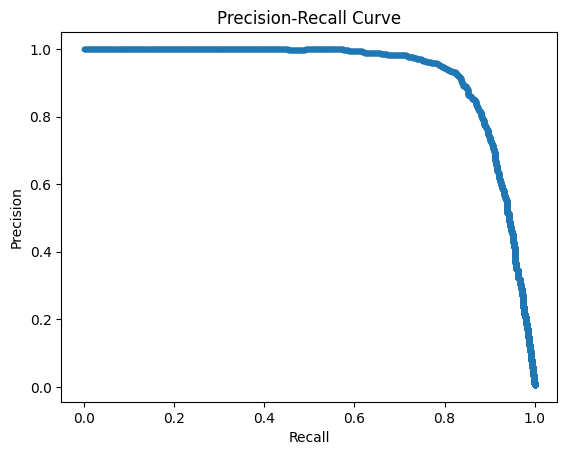

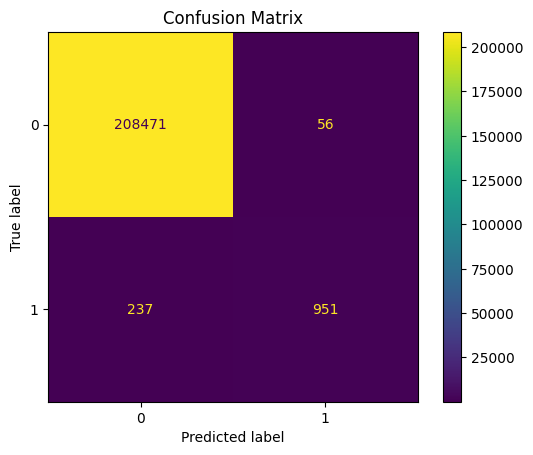

In [310]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import precision_recall_curve, confusion_matrix, ConfusionMatrixDisplay

# Stratified cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(pipeline, x_train, y_train, cv=cv, scoring='f1')
print(f"Cross-validation F1 scores: {cv_scores}")
print(f"Mean CV F1 score: {cv_scores.mean():.4f}")

# Precision-Recall Curve
y_proba = pipeline.predict_proba(x_test)[:, 1]
precision, recall, _ = precision_recall_curve(y_test, y_proba)
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

# Confusion Matrix
y_pred = pipeline.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()
plt.title('Confusion Matrix')
plt.show()

In [311]:
import optuna

def objective(trial):
    params = {
        'classifier__n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'classifier__max_depth': trial.suggest_int('max_depth', 3, 10),
        'classifier__learning_rate': trial.suggest_float('learning_rate', 0.01, 0.2),
        'classifier__subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'classifier__colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
        'classifier__gamma': trial.suggest_float('gamma', 0, 0.2),
        'classifier__scale_pos_weight': trial.suggest_float('scale_pos_weight', 1, 100),
    }
    pipeline.set_params(**params)
    return cross_val_score(pipeline, x_train, y_train, cv=3, scoring='f1').mean()

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)
print("Best hyperparameters:", study.best_params)

[I 2025-03-06 00:59:44,556] A new study created in memory with name: no-name-f1796ecc-ab60-456c-867a-8ca22c7d9a34
[I 2025-03-06 01:00:24,178] Trial 0 finished with value: 0.8399722619804288 and parameters: {'n_estimators': 729, 'max_depth': 4, 'learning_rate': 0.12357963700249455, 'subsample': 0.7805375513759277, 'colsample_bytree': 0.6532248861416601, 'gamma': 0.14845261866538867, 'scale_pos_weight': 5.668437969692466}. Best is trial 0 with value: 0.8399722619804288.
[I 2025-03-06 01:01:16,455] Trial 1 finished with value: 0.8593150260100652 and parameters: {'n_estimators': 724, 'max_depth': 10, 'learning_rate': 0.07917042209740377, 'subsample': 0.7230253213631883, 'colsample_bytree': 0.7920881007708331, 'gamma': 0.18322828031244007, 'scale_pos_weight': 48.82488416962743}. Best is trial 1 with value: 0.8593150260100652.
[I 2025-03-06 01:02:01,332] Trial 2 finished with value: 0.8069681870145083 and parameters: {'n_estimators': 831, 'max_depth': 4, 'learning_rate': 0.17407419492565662,

Best hyperparameters: {'n_estimators': 701, 'max_depth': 7, 'learning_rate': 0.10325382964003633, 'subsample': 0.970912041377506, 'colsample_bytree': 0.8874219189339966, 'gamma': 0.02662523815266624, 'scale_pos_weight': 7.577155386931658}


In [315]:
from optuna.visualization import plot_optimization_history, plot_param_importances, plot_slice, plot_contour, plot_parallel_coordinate

In [317]:
plot_param_importances(study).show()

ImportError: Tried to import 'plotly' but failed. Please make sure that the package is installed correctly to use this feature. Actual error: No module named 'plotly'.

In [316]:
plot_optimization_history(study).show()

ImportError: Tried to import 'plotly' but failed. Please make sure that the package is installed correctly to use this feature. Actual error: No module named 'plotly'.